<a href="https://colab.research.google.com/github/hidayetyakupoglu/Anomaly-Detection/blob/master/windy_GF3_PSO_adl%C4%B1_not_defterinin_kopyas%C4%B1_adl%C4%B1_not_defterinin_kopyas%C4%B1_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
!pip install scikit-learn==1.0.2

In [146]:
#!wget https://github.com/hidayetyakupoglu/wind-data/blob/49ddb5bcde2639f741ac0fedfb3aeaef3da5d2c9/wind_fault.xlsx

In [147]:
#!"https://github.com/hidayetyakupoglu/wind-data/blob/b14ee90fe58f1f90ea8eee9e2893e7b139fbdf28/wind_fault.csv"

In [148]:
!pip install openpyxl

ERROR: Operation cancelled by user


In [154]:
import pandas as pd
import openpyxl
ddf = pd.read_excel('wind_fault.xlsx')


In [155]:
ddf

,Unnamed: 0,DateTime_x,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,...,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,Fault
0,0,2014-05-01 00:00:00,6.9,9.4,2.9,0.00,0.02,0.00,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
1,1,2014-05-01 00:09:00,5.3,8.9,1.6,0.00,0.01,0.00,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
2,2,2014-05-01 00:20:00,5.0,9.5,1.4,0.00,0.04,0.00,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
3,3,2014-05-01 00:30:00,4.4,8.3,1.3,0.00,0.08,0.00,0,0,...,21,25,12,14,24,34,2501,25.272728,1.103713,NF
4,4,2014-05-01 00:39:00,5.7,9.7,1.2,0.00,0.05,0.00,0,0,...,21,25,12,14,23,34,2501,25.272728,1.103713,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49129,49129,2015-04-08 23:20:00,3.9,5.5,2.2,6.75,7.40,6.01,147,277,...,23,28,9,17,27,35,3050,24.454546,3.474583,NF
49130,49130,2015-04-08 23:30:00,3.9,5.6,2.9,6.64,7.06,6.33,128,191,...,23,28,9,17,27,35,3050,24.454546,3.445683,NF
49131,49131,2015-04-08 23:39:00,4.2,6.7,2.6,7.18,8.83,6.22,163,329,...,23,28,9,18,27,34,3050,24.363636,3.413876,NF
49132,49132,2015-04-08 23:50:00,4.1,6.6,2.7,7.02,7.94,6.20,160,344,...,23,28,9,17,27,34,3050,24.000000,3.376389,NF


In [156]:
# prompt: Unnamed: 0 adlı sütunu sil

ddf.drop('Unnamed: 0', axis=1, inplace=True)
ddf


,DateTime_x,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: min. Power,...,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,Fault
0,2014-05-01 00:00:00,6.9,9.4,2.9,0.00,0.02,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
1,2014-05-01 00:09:00,5.3,8.9,1.6,0.00,0.01,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
2,2014-05-01 00:20:00,5.0,9.5,1.4,0.00,0.04,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
3,2014-05-01 00:30:00,4.4,8.3,1.3,0.00,0.08,0.00,0,0,0,...,21,25,12,14,24,34,2501,25.272728,1.103713,NF
4,2014-05-01 00:39:00,5.7,9.7,1.2,0.00,0.05,0.00,0,0,0,...,21,25,12,14,23,34,2501,25.272728,1.103713,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49129,2015-04-08 23:20:00,3.9,5.5,2.2,6.75,7.40,6.01,147,277,46,...,23,28,9,17,27,35,3050,24.454546,3.474583,NF
49130,2015-04-08 23:30:00,3.9,5.6,2.9,6.64,7.06,6.33,128,191,82,...,23,28,9,17,27,35,3050,24.454546,3.445683,NF
49131,2015-04-08 23:39:00,4.2,6.7,2.6,7.18,8.83,6.22,163,329,72,...,23,28,9,18,27,34,3050,24.363636,3.413876,NF
49132,2015-04-08 23:50:00,4.1,6.6,2.7,7.02,7.94,6.20,160,344,67,...,23,28,9,17,27,34,3050,24.000000,3.376389,NF


In [157]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from tensorflow import keras

from numpy.random import seed

#import logging
#logging.basicConfig(level=logging.DEBUG)
#tf._logging.set_verbosity(tf._logging.error)

#tensorflow.random.set_seed
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers
from keras.layers import GRU, LSTM
from sklearn.metrics import plot_confusion_matrix, classification_report
import plotly.express as px
from sklearn.preprocessing import Normalizer

from keras.layers import Dense
from keras.models import Sequential

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from scipy.spatial.distance import mahalanobis

import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import (f_classif, SelectKBest)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn import metrics

from sklearn.feature_extraction.text import CountVectorizer


from imblearn.over_sampling import SMOTE

from matplotlib import pyplot as plt
import seaborn as sns

import tensorflow as tf
sns.set_style('whitegrid')
%matplotlib inline
import keras
import keras.backend as k
from keras.layers import GRU, LSTM
from keras.models import Sequential
from keras.models import Model
from keras import regularizers
from keras.callbacks import History
import warnings
warnings.filterwarnings("ignore")

In [158]:
data=ddf

In [159]:
perc=0.3   # test oranı orn:0.3 ise %70 train %30 testtir
fau='GF'   # arıza türleridir 'GF' 'AF' 'MF' 'FF' 'EF'
fau

'GF'

In [160]:
data

,DateTime_x,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: min. Power,...,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,Fault
0,2014-05-01 00:00:00,6.9,9.4,2.9,0.00,0.02,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
1,2014-05-01 00:09:00,5.3,8.9,1.6,0.00,0.01,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
2,2014-05-01 00:20:00,5.0,9.5,1.4,0.00,0.04,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
3,2014-05-01 00:30:00,4.4,8.3,1.3,0.00,0.08,0.00,0,0,0,...,21,25,12,14,24,34,2501,25.272728,1.103713,NF
4,2014-05-01 00:39:00,5.7,9.7,1.2,0.00,0.05,0.00,0,0,0,...,21,25,12,14,23,34,2501,25.272728,1.103713,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49129,2015-04-08 23:20:00,3.9,5.5,2.2,6.75,7.40,6.01,147,277,46,...,23,28,9,17,27,35,3050,24.454546,3.474583,NF
49130,2015-04-08 23:30:00,3.9,5.6,2.9,6.64,7.06,6.33,128,191,82,...,23,28,9,17,27,35,3050,24.454546,3.445683,NF
49131,2015-04-08 23:39:00,4.2,6.7,2.6,7.18,8.83,6.22,163,329,72,...,23,28,9,18,27,34,3050,24.363636,3.413876,NF
49132,2015-04-08 23:50:00,4.1,6.6,2.7,7.02,7.94,6.20,160,344,67,...,23,28,9,17,27,34,3050,24.000000,3.376389,NF


In [161]:
data = data[data['Fault'].isin([fau, 'NF'])]
data

,DateTime_x,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: min. Power,...,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,Fault
0,2014-05-01 00:00:00,6.9,9.4,2.9,0.00,0.02,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
1,2014-05-01 00:09:00,5.3,8.9,1.6,0.00,0.01,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
2,2014-05-01 00:20:00,5.0,9.5,1.4,0.00,0.04,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
3,2014-05-01 00:30:00,4.4,8.3,1.3,0.00,0.08,0.00,0,0,0,...,21,25,12,14,24,34,2501,25.272728,1.103713,NF
4,2014-05-01 00:39:00,5.7,9.7,1.2,0.00,0.05,0.00,0,0,0,...,21,25,12,14,23,34,2501,25.272728,1.103713,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49129,2015-04-08 23:20:00,3.9,5.5,2.2,6.75,7.40,6.01,147,277,46,...,23,28,9,17,27,35,3050,24.454546,3.474583,NF
49130,2015-04-08 23:30:00,3.9,5.6,2.9,6.64,7.06,6.33,128,191,82,...,23,28,9,17,27,35,3050,24.454546,3.445683,NF
49131,2015-04-08 23:39:00,4.2,6.7,2.6,7.18,8.83,6.22,163,329,72,...,23,28,9,18,27,34,3050,24.363636,3.413876,NF
49132,2015-04-08 23:50:00,4.1,6.6,2.7,7.02,7.94,6.20,160,344,67,...,23,28,9,17,27,34,3050,24.000000,3.376389,NF


In [162]:
data_n1 = data[(data['DateTime_x'] >= '2014-05-10') & (data['DateTime_x'] <= '2014-05-14 14:30:00	')]
data_n2 = data[(data['DateTime_x'] >= '2014-10-13') & (data['DateTime_x'] <= '2014-10-17 11:30:00	')]
data_n3 = data[(data['DateTime_x'] >= '2014-10-22') & (data['DateTime_x'] <= '2014-10-26 18:00:00	')]
data_n4 = data[(data['DateTime_x'] >= '2015-01-03') & (data['DateTime_x'] <= '2015-01-07 18:00:00	')]

In [163]:
data_hy=data

#data_hy = data_hy.drop(data_hy[(data_hy['WEC: max. Power'] == 0) & (data_hy.iloc[:, -1] == 'NF')].index)
data_nf = data_hy[data_hy.Fault == 'NF'].sample(2000, random_state = 123)

df_f = data_hy[data_hy.Fault!='NF']



In [164]:
data_n3

,DateTime_x,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: min. Power,...,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,Fault
25005,2014-10-22 00:00:00,6.1,7.8,4.6,8.82,10.22,7.16,537,917,209,...,22,28,12,26,36,47,3050,29.545454,1.293340,NF
25006,2014-10-22 00:09:00,7.3,9.0,6.1,10.83,11.70,10.02,1166,1545,829,...,22,28,12,27,36,46,3050,28.909090,0.943880,NF
25007,2014-10-22 00:20:00,7.8,9.2,5.9,10.92,11.64,10.35,1203,1517,962,...,23,27,11,27,36,46,3050,28.909090,1.136182,NF
25008,2014-10-22 00:30:00,8.6,9.4,7.5,11.82,12.59,11.18,1608,1964,1311,...,22,27,11,27,36,46,3050,29.000000,1.183216,NF
25009,2014-10-22 00:39:00,9.1,10.3,7.5,12.84,13.24,12.50,2056,2264,1894,...,23,28,11,27,36,46,3050,28.909090,1.445998,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25479,2014-10-25 07:01:00,3.9,9.5,1.5,0.00,0.05,0.00,0,0,0,...,23,27,12,20,31,49,3050,32.090908,3.144981,NF
25480,2014-10-25 07:09:00,4.7,10.8,1.3,0.01,0.11,0.00,0,0,0,...,23,27,12,19,31,48,3050,32.090908,3.144981,NF
25481,2014-10-25 07:20:00,6.1,11.6,1.9,0.00,0.07,0.00,0,0,0,...,22,27,12,19,30,48,3050,32.090908,3.144981,NF
25482,2014-10-25 07:30:00,7.7,11.9,1.9,0.00,0.06,0.00,0,0,0,...,22,27,12,19,30,48,3050,32.000000,3.130495,NF


In [165]:
data_nf

,DateTime_x,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: min. Power,...,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,Fault
33455,2014-12-20 19:50:00,7.9,11.0,5.2,11.02,12.71,9.69,1261,2027,721,...,21,26,10,20,27,36,3050,21.909090,1.300350,NF
13801,2014-08-05 14:39:00,4.8,5.9,3.9,7.19,7.58,6.91,208,272,165,...,30,35,19,26,35,42,3050,31.272728,2.686667,NF
38936,2015-01-28 02:19:00,11.3,15.9,8.3,14.06,14.80,13.23,2972,3146,2273,...,25,27,12,28,36,58,3050,28.818182,2.272364,NF
38859,2015-01-27 13:29:00,9.0,11.9,6.1,12.32,13.73,10.03,1849,2718,835,...,22,25,11,20,27,35,3050,22.000000,1.341641,NF
25085,2014-10-22 13:20:00,11.6,15.9,7.1,14.10,14.86,13.29,3006,3144,2325,...,27,30,16,28,36,54,3050,30.909090,2.385563,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13983,2014-08-06 20:59:00,6.1,7.8,4.2,9.01,9.52,8.20,547,652,385,...,29,34,19,31,39,48,3050,34.181820,2.182576,NF
18043,2014-09-04 00:39:00,6.2,7.5,4.8,8.95,9.39,8.35,537,623,417,...,27,32,18,27,35,44,3050,31.454546,1.863526,NF
33403,2014-12-20 11:10:00,5.2,8.0,2.5,7.94,10.41,6.75,311,949,133,...,21,27,11,20,28,37,3050,23.727272,1.954017,NF
33250,2014-12-19 09:40:00,8.5,10.1,6.7,11.95,13.19,10.77,1671,2222,1139,...,21,25,9,24,32,43,3050,25.000000,1.732051,NF


In [166]:
data_nf_new = pd.concat([data_nf, data_n1, data_n2, data_n3, data_n4], ignore_index=True)

In [167]:
data_nf_new = data_nf_new.drop_duplicates(subset='DateTime_x', keep='last')
data_nf_new

,DateTime_x,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: min. Power,...,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,Fault
0,2014-12-20 19:50:00,7.9,11.0,5.2,11.02,12.71,9.69,1261,2027,721,...,21,26,10,20,27,36,3050,21.909090,1.300350,NF
1,2014-08-05 14:39:00,4.8,5.9,3.9,7.19,7.58,6.91,208,272,165,...,30,35,19,26,35,42,3050,31.272728,2.686667,NF
2,2015-01-28 02:19:00,11.3,15.9,8.3,14.06,14.80,13.23,2972,3146,2273,...,25,27,12,28,36,58,3050,28.818182,2.272364,NF
3,2015-01-27 13:29:00,9.0,11.9,6.1,12.32,13.73,10.03,1849,2718,835,...,22,25,11,20,27,35,3050,22.000000,1.341641,NF
5,2015-03-20 11:00:00,6.1,7.6,4.3,8.75,10.15,8.10,506,801,360,...,22,28,13,18,25,32,3050,20.818182,1.940009,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4461,2015-01-07 17:19:00,13.3,18.6,9.5,9.97,10.63,9.54,0,0,0,...,20,23,13,12,20,31,3050,22.272728,1.272078,NF
4462,2015-01-07 17:30:00,11.4,15.2,8.0,9.99,10.54,9.54,0,0,0,...,20,23,13,12,21,31,3050,21.909090,1.445998,NF
4463,2015-01-07 17:40:00,9.0,15.6,2.6,4.57,10.31,0.00,0,0,0,...,21,23,13,13,21,31,3050,21.727272,1.272078,NF
4464,2015-01-07 17:49:00,11.6,17.4,4.9,6.98,10.57,1.09,0,0,0,...,21,24,13,13,21,31,3050,22.000000,1.183216,NF


In [168]:
# prompt: DateTime_x 2014-12-10 10:40 OLAN SATIRI sil
data_nf=data_nf_new
data_nf = data_nf.drop(data_nf.loc[data_nf['DateTime_x'] == '2014-12-10 10:40'].index)


In [169]:
df_f


,DateTime_x,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: min. Power,...,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,Fault
1945,2014-05-14 14:39:00,5.700000,7.400000,4.1,9.98,10.23,9.72,0,0,0,...,23,27,17,26,35,34,2501,25.818182,0.603023,GF
1946,2014-05-14 14:50:00,6.400000,8.600000,2.7,4.12,10.71,0.70,0,0,0,...,23,27,17,26,35,34,2501,26.090910,0.943880,GF
1947,2014-05-14 14:58:00,5.600000,7.500000,4.0,9.99,10.20,9.80,0,0,0,...,23,27,17,26,35,34,2501,26.454546,0.820200,GF
1948,2014-05-14 15:09:00,5.300000,6.600000,4.1,9.98,10.17,9.79,0,0,0,...,23,27,18,26,35,34,2501,26.181818,0.873863,GF
1949,2014-05-14 15:20:00,5.100000,7.200000,3.8,9.99,10.17,9.80,0,0,0,...,23,28,18,26,35,34,2501,26.181818,0.981650,GF
1950,2014-05-14 15:30:00,4.400000,7.100000,1.2,6.17,10.19,0.00,0,0,0,...,23,28,18,25,35,35,2501,26.363636,1.120065,GF
24322,2014-10-17 11:49:00,13.100000,18.799999,3.7,6.14,10.63,0.00,0,0,0,...,25,27,17,19,27,45,3050,34.181820,1.662419,GF
24323,2014-10-17 11:59:00,14.800000,18.500000,11.0,9.97,10.42,9.50,0,0,0,...,25,28,17,20,27,45,3050,32.727272,1.555050,GF
24324,2014-10-17 12:10:00,16.700001,22.100000,11.8,8.04,10.49,2.97,0,0,0,...,25,28,17,21,29,45,3050,31.272728,1.009050,GF
25484,2014-10-26 18:10:00,6.900000,20.600000,2.6,0.16,1.68,0.00,0,0,0,...,19,19,15,16,19,17,3050,17.545454,0.522233,GF


In [170]:
# prompt: DateTime_x: 2014-05-14 14:39:00 , 2014-10-17 11:49:00, 2014-10-26 18:10:00, 2015-01-07 18:10:00 olan satırları seç geri kalanını at

df_f = df_f .loc[df_f['DateTime_x'].isin(['2014-05-14 14:39:00', '2014-10-17 11:49:00', '2014-10-26 18:10:00', '2015-01-07 18:10:00'])]


In [171]:
df_f

,DateTime_x,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: min. Power,...,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,Fault
1945,2014-05-14 14:39:00,5.7,7.400000,4.1,9.98,10.23,9.72,0,0,0,...,23,27,17,26,35,34,2501,25.818182,0.603023,GF
24322,2014-10-17 11:49:00,13.1,18.799999,3.7,6.14,10.63,0.00,0,0,0,...,25,27,17,19,27,45,3050,34.181820,1.662419,GF
25484,2014-10-26 18:10:00,6.9,20.600000,2.6,0.16,1.68,0.00,0,0,0,...,19,19,15,16,19,17,3050,17.545454,0.522233,GF
36038,2015-01-07 18:10:00,12.2,20.100000,2.6,8.53,10.44,0.00,0,0,0,...,21,24,12,13,21,31,3050,21.909090,1.375103,GF


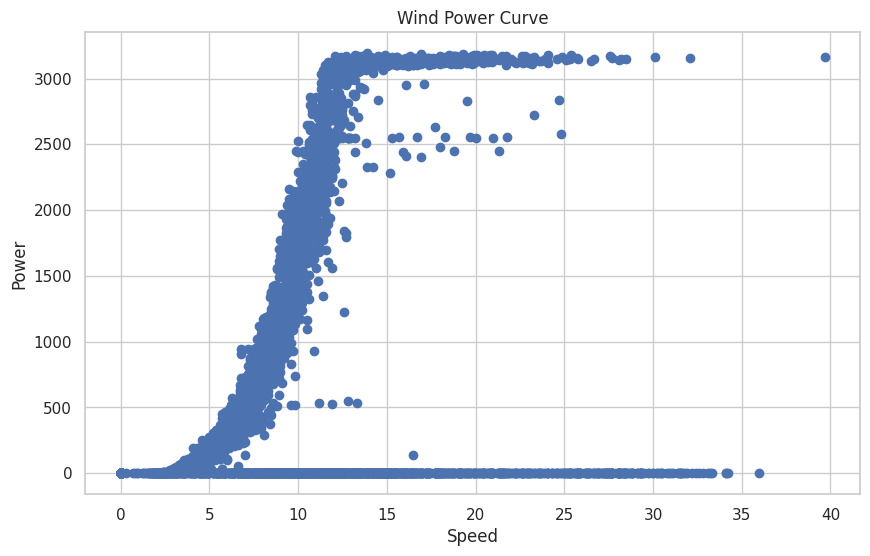

In [172]:
w_data=data_nf
w_data=w_data.sort_index()

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(w_data['WEC: max. windspeed'], w_data['WEC: max. Power'],'o')  # Adjust column names as needed

plt.xlabel('Speed')
plt.ylabel('Power')
plt.title('Wind Power Curve')
plt.grid(True)

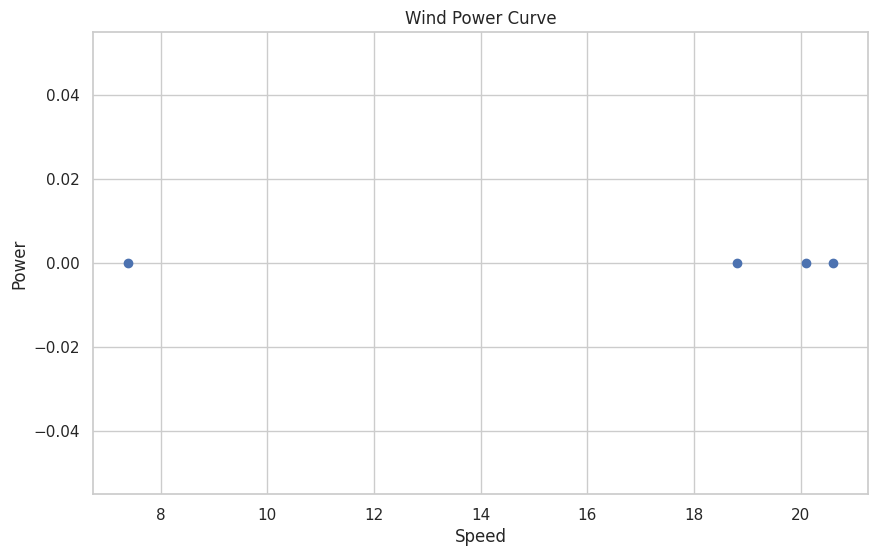

In [173]:
w_data1=df_f
w_data1=w_data1.sort_index()

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(w_data1['WEC: max. windspeed'], w_data1['WEC: max. Power'],'o')  # Adjust column names as needed

plt.xlabel('Speed')
plt.ylabel('Power')
plt.title('Wind Power Curve')
plt.grid(True)

df1=w_data
con0 = (df1['WEC: max. windspeed'] > 8) & (df1['WEC: max. Power'] < 300)

con1 = (df1['WEC: max. windspeed'] > 12) & (df1['WEC: max. Power'] < 2000)

con2 = (df1['WEC: max. windspeed'] > 14) & (df1['WEC: max. Power'] < 2800)

# İkinci koşul: Rüzgar hızı 8'den büyük ve güç 600'den düşükse

con7 = (df1['WEC: max. windspeed'] > 9) & (df1['WEC: max. Power'] < 600)

con3 = (df1['WEC: max. windspeed'] > 15) & (df1['WEC: max. Power'] < 3000)
con4 = (df1['WEC: max. windspeed'] > 13) & (df1['WEC: max. Power'] < 2700)

#con5 = (df1['WEC: max. windspeed'] > 6) & (df1['WEC: max. Power'] < 0)

con6 = (df1['WEC: max. windspeed'] > 25) & (df1['WEC: max. Power'] > 3000)

# İki koşulu birleştirip uygun olan satırları seçelim
mask = con0 | con1| con2| con3| con4| con6| con7

# Maskeye uyan satırları DataFrame'den çıkaralım
df2 = df1[~mask]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df2['WEC: max. windspeed'], df2['WEC: max. Power'],'o')  # Adjust column names as needed
plt.xlabel('windspeed')
plt.ylabel('Power')
plt.title('Wind Power Curve')
plt.grid(True)

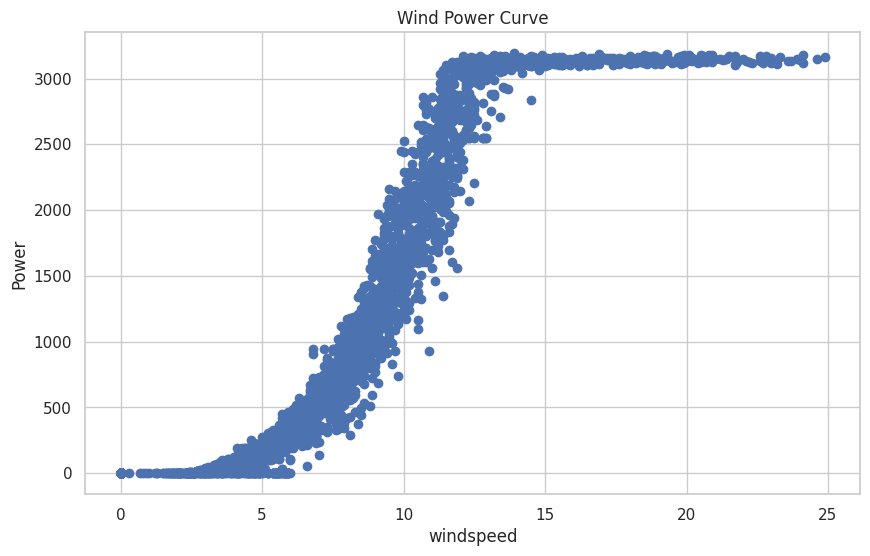

In [174]:
df1=w_data
con0 = (df1['WEC: max. windspeed'] > 8) & (df1['WEC: max. Power'] < 200)

con1 = (df1['WEC: max. windspeed'] > 12) & (df1['WEC: max. Power'] < 2000)

con2 = (df1['WEC: max. windspeed'] > 14) & (df1['WEC: max. Power'] < 2800)

# İkinci koşul: Rüzgar hızı 8'den büyük ve güç 600'den düşükse

con7 = (df1['WEC: max. windspeed'] > 9) & (df1['WEC: max. Power'] < 600)

con3 = (df1['WEC: max. windspeed'] > 15) & (df1['WEC: max. Power'] < 3000)
con4 = (df1['WEC: max. windspeed'] > 13) & (df1['WEC: max. Power'] < 2700)

con5 = (df1['WEC: max. windspeed'] > 6) & (df1['WEC: max. Power'] < 10)

con6 = (df1['WEC: max. windspeed'] > 25) & (df1['WEC: max. Power'] > 3000)

# İki koşulu birleştirip uygun olan satırları seçelim
mask = con0 | con1| con2| con3| con4| con5| con6| con7

# Maskeye uyan satırları DataFrame'den çıkaralım
df2 = df1[~mask]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df2['WEC: max. windspeed'], df2['WEC: max. Power'],'o')  # Adjust column names as needed
plt.xlabel('windspeed')
plt.ylabel('Power')
plt.title('Wind Power Curve')
plt.grid(True)

df1=w_data


con5 = (df1['WEC: max. windspeed'] > 6) & (df1['WEC: max. Power'] < 10)

con6 = (df1['WEC: max. windspeed'] > 25) & (df1['WEC: max. Power'] > 3000)

# İki koşulu birleştirip uygun olan satırları seçelim
mask = con5| con6

# Maskeye uyan satırları DataFrame'den çıkaralım
df2 = df1[~mask]

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.plot(df2['WEC: max. windspeed'], df2['WEC: max. Power'],'o')  # Adjust column names as needed
plt.xlabel('windspeed')
plt.ylabel('Power')
plt.title('Wind Power Curve')
plt.grid(True)

In [175]:
df2.reset_index(drop=True, inplace=True)


In [176]:
df_combine = pd.concat((df2, df_f), axis=0).reset_index(drop=True)

df_combine
data_hy1=df_combine

data_hy1=data_hy1.set_index('DateTime_x')

In [177]:
data_hy1

,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: min. Power,WEC: ava. Nacel position including cable twisting,...,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,Fault
DateTime_x,,,,,,,,,,,,,,,,,,,,,
2014-12-20 19:50:00,7.9,11.000000,5.2,11.02,12.71,9.69,1261,2027,721,-85,...,21,26,10,20,27,36,3050,21.909090,1.300350,NF
2014-08-05 14:39:00,4.8,5.900000,3.9,7.19,7.58,6.91,208,272,165,-211,...,30,35,19,26,35,42,3050,31.272728,2.686667,NF
2015-01-28 02:19:00,11.3,15.900000,8.3,14.06,14.80,13.23,2972,3146,2273,-84,...,25,27,12,28,36,58,3050,28.818182,2.272364,NF
2015-01-27 13:29:00,9.0,11.900000,6.1,12.32,13.73,10.03,1849,2718,835,-97,...,22,25,11,20,27,35,3050,22.000000,1.341641,NF
2015-03-20 11:00:00,6.1,7.600000,4.3,8.75,10.15,8.10,506,801,360,-2,...,22,28,13,18,25,32,3050,20.818182,1.940009,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-01-06 18:59:00,0.0,0.000000,0.0,0.00,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,3050,0.000000,0.000000,NF
2014-05-14 14:39:00,5.7,7.400000,4.1,9.98,10.23,9.72,0,0,0,-84,...,23,27,17,26,35,34,2501,25.818182,0.603023,GF
2014-10-17 11:49:00,13.1,18.799999,3.7,6.14,10.63,0.00,0,0,0,186,...,25,27,17,19,27,45,3050,34.181820,1.662419,GF


In [178]:
# prompt: Fault= NF olan ve WEC: max. Power=0 olan satırları göster ve bunları temizle


# Filter the data to show only rows where Fault=NF and WEC: max. Power=0
filtered_data = data_hy1[(data_hy1['Fault'] == 'NF') & (data_hy1['WEC: max. Power'] == 0) & (data_hy1['WEC: max. windspeed']==0)& (data_hy1['WEC: max. Rotation']==0)]

# Print the filtered dat

# Remove the filtered rows from the original data
cleaned_data = data_hy1.drop(filtered_data.index)




In [179]:
# prompt: 2014-05-18 tarihinden önceki verileri çıkar

cleaned_data = cleaned_data[cleaned_data.index > '2014-05-17']


In [180]:
data_hy

,DateTime_x,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: min. Power,...,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,Fault
0,2014-05-01 00:00:00,6.9,9.4,2.9,0.00,0.02,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
1,2014-05-01 00:09:00,5.3,8.9,1.6,0.00,0.01,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
2,2014-05-01 00:20:00,5.0,9.5,1.4,0.00,0.04,0.00,0,0,0,...,20,25,12,14,24,34,2501,25.272728,1.103713,NF
3,2014-05-01 00:30:00,4.4,8.3,1.3,0.00,0.08,0.00,0,0,0,...,21,25,12,14,24,34,2501,25.272728,1.103713,NF
4,2014-05-01 00:39:00,5.7,9.7,1.2,0.00,0.05,0.00,0,0,0,...,21,25,12,14,23,34,2501,25.272728,1.103713,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49129,2015-04-08 23:20:00,3.9,5.5,2.2,6.75,7.40,6.01,147,277,46,...,23,28,9,17,27,35,3050,24.454546,3.474583,NF
49130,2015-04-08 23:30:00,3.9,5.6,2.9,6.64,7.06,6.33,128,191,82,...,23,28,9,17,27,35,3050,24.454546,3.445683,NF
49131,2015-04-08 23:39:00,4.2,6.7,2.6,7.18,8.83,6.22,163,329,72,...,23,28,9,18,27,34,3050,24.363636,3.413876,NF
49132,2015-04-08 23:50:00,4.1,6.6,2.7,7.02,7.94,6.20,160,344,67,...,23,28,9,17,27,34,3050,24.000000,3.376389,NF


In [181]:
# Filtre uygulamadan

# data_af=cleaned_data

data_hy = pd.concat((data_nf, df_f), axis=0).reset_index(drop=True)


data_hy=data_hy.set_index('DateTime_x')


data_hy = data_hy[data_hy.index > '2014-05-17']
data_hy1 = data_hy1[data_hy1.index > '2014-05-17']
#data_af=data_hy

data_af=data_hy1
data_af = data_af.sort_index()


data_af = data_af.drop(columns=['WEC: ava. blade angle A','WEC: ava. reactive Power','WEC: min. Rotation','WEC: max. Rotation','WEC: ava. Rotation','WEC: min. windspeed','WEC: ava. Power','WEC: max. reactive Power','WEC: min. Power','WEC: min. reactive Power','WEC: Production kWh','WEC: ava. available P from wind','WEC: ava. windspeed','WEC: max. windspeed','WEC: max. Power'])

In [182]:
hdata=data_af['Fault'].replace('NF', 0, inplace=True)
hdata=data_af['Fault'].replace(fau, 1, inplace=True)

In [183]:
data_afx= data_af.drop(columns=['Fault'])
data_afx

,WEC: ava. Nacel position including cable twisting,Sys 1 inverter 1 cabinet temp.,Sys 1 inverter 2 cabinet temp.,Sys 1 inverter 3 cabinet temp.,Sys 1 inverter 4 cabinet temp.,Sys 1 inverter 5 cabinet temp.,Sys 1 inverter 6 cabinet temp.,Sys 1 inverter 7 cabinet temp.,Sys 2 inverter 1 cabinet temp.,Sys 2 inverter 2 cabinet temp.,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev
DateTime_x,,,,,,,,,,,,,,,,,,,,,
2014-05-17 02:30:00,288,26,27,26,26,27,26,30,33,32,...,34,26,34,12,24,34,41,2501,28.909090,3.080732
2014-05-17 06:09:00,263,24,25,24,24,26,29,30,31,31,...,35,25,32,14,22,32,39,2501,27.818182,3.188046
2014-05-17 08:20:00,283,29,30,29,29,31,30,29,32,31,...,39,27,32,22,19,30,42,2501,29.818182,1.078720
2014-05-17 08:39:00,278,29,30,29,30,32,30,30,32,32,...,39,27,32,20,18,30,42,2501,30.181818,1.328020
2014-05-18 10:00:00,278,25,26,25,25,27,27,28,32,31,...,34,24,30,15,24,33,40,2501,28.090910,2.879394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 14:29:00,160,19,21,20,20,21,21,25,27,26,...,33,23,29,12,17,26,33,3050,22.909090,3.080732
2015-04-08 15:09:00,163,20,22,21,21,22,21,20,27,26,...,33,23,30,12,18,26,32,3050,22.909090,2.773249
2015-04-08 16:30:00,160,21,23,22,23,23,23,21,24,27,...,34,24,31,12,19,27,33,3050,23.818182,2.442056


In [184]:
hdata=data_af['Fault'].replace('NF', 0, inplace=True)
hdata=data_af['Fault'].replace(fau, 1, inplace=True)

In [185]:
data_afx= data_af.drop(columns=['Fault'])
data_afy=data_af['Fault']

In [186]:
scaler1 = preprocessing.MinMaxScaler()

x_new = pd.DataFrame(scaler1.fit_transform(data_afx),
                              columns = data_afx.columns,
                              index = data_afx.index)

In [187]:
x_new

,WEC: ava. Nacel position including cable twisting,Sys 1 inverter 1 cabinet temp.,Sys 1 inverter 2 cabinet temp.,Sys 1 inverter 3 cabinet temp.,Sys 1 inverter 4 cabinet temp.,Sys 1 inverter 5 cabinet temp.,Sys 1 inverter 6 cabinet temp.,Sys 1 inverter 7 cabinet temp.,Sys 2 inverter 1 cabinet temp.,Sys 2 inverter 2 cabinet temp.,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev
DateTime_x,,,,,,,,,,,,,,,,,,,,,
2014-05-17 02:30:00,0.704657,0.714286,0.745455,0.727273,0.754717,0.745455,0.754717,0.814815,0.854545,0.836364,...,0.739130,0.702703,0.790698,0.342857,0.666667,0.772727,0.666667,0.0,0.794613,0.263117
2014-05-17 06:09:00,0.689338,0.678571,0.709091,0.690909,0.716981,0.727273,0.811321,0.814815,0.818182,0.818182,...,0.760870,0.675676,0.744186,0.400000,0.611111,0.727273,0.644444,0.0,0.774411,0.272283
2014-05-17 08:20:00,0.701593,0.767857,0.800000,0.781818,0.811321,0.818182,0.830189,0.796296,0.836364,0.818182,...,0.847826,0.729730,0.744186,0.628571,0.527778,0.681818,0.677778,0.0,0.811448,0.092131
2014-05-17 08:39:00,0.698529,0.767857,0.800000,0.781818,0.830189,0.836364,0.830189,0.814815,0.836364,0.836364,...,0.847826,0.729730,0.744186,0.571429,0.500000,0.681818,0.677778,0.0,0.818182,0.113423
2014-05-18 10:00:00,0.698529,0.696429,0.727273,0.709091,0.735849,0.745455,0.773585,0.777778,0.836364,0.818182,...,0.739130,0.648649,0.697674,0.428571,0.666667,0.750000,0.655556,0.0,0.779461,0.245922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 14:29:00,0.626225,0.589286,0.636364,0.618182,0.641509,0.636364,0.660377,0.722222,0.745455,0.727273,...,0.717391,0.621622,0.674419,0.342857,0.472222,0.590909,0.577778,1.0,0.683502,0.263117
2015-04-08 15:09:00,0.628064,0.607143,0.654545,0.636364,0.660377,0.654545,0.660377,0.629630,0.745455,0.727273,...,0.717391,0.621622,0.697674,0.342857,0.500000,0.590909,0.566667,1.0,0.683502,0.236856
2015-04-08 16:30:00,0.626225,0.625000,0.672727,0.654545,0.698113,0.672727,0.698113,0.648148,0.690909,0.745455,...,0.739130,0.648649,0.720930,0.342857,0.527778,0.613636,0.577778,1.0,0.700337,0.208570


In [188]:
from sklearn.linear_model import Lasso

# Create a Lasso model
model = Lasso()

# Fit the model to the data
model.fit(x_new, data_afy)

# Get the feature importances
importances = np.abs(model.coef_)

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'feature': x_new.columns, 'importance': importances})

# Sort the dataframe by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top 10 features
print(feature_importances.head(15))

# Select the top 10 features
selected_features_lasso = feature_importances['feature'][:15]



                                              feature  importance
0   WEC: ava. Nacel position including cable twisting         0.0
32                                 Main carrier temp.         0.0
24                                      Rotor temp. 1         0.0
25                                      Rotor temp. 2         0.0
26                                     Stator temp. 1         0.0
27                                     Stator temp. 2         0.0
28                            Nacelle ambient temp. 1         0.0
29                            Nacelle ambient temp. 2         0.0
30                                      Nacelle temp.         0.0
31                              Nacelle cabinet temp.         0.0
33                            Rectifier cabinet temp.         0.0
22                                      Blade B temp.         0.0
34                         Yaw inverter cabinet temp.         0.0
35                         Fan inverter cabinet temp.         0.0
36        

In [189]:

# Feature Selection
selector = SelectKBest(f_classif, k=15)
X_new = selector.fit_transform(x_new, data_afy)

# Get the selected features
selected_features_kbest = x_new.columns[selector.get_support()]

# Print the selected features
print(selected_features_kbest)


Index(['Spinner temp.', 'Front bearing temp.', 'Rear bearing temp.',
       'Pitch cabinet blade B temp.', 'Pitch cabinet blade C temp.',
       'Rotor temp. 1', 'Rotor temp. 2', 'Stator temp. 1', 'Stator temp. 2',
       'Rectifier cabinet temp.', 'Fan inverter cabinet temp.', 'Tower temp.',
       'Control cabinet temp.', 'Transformer temp.', 'Inverter std dev'],
      dtype='object')


In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel


sel = SelectFromModel(RandomForestClassifier(n_estimators = 1000))
sel.fit(x_new,data_afy)
sel.get_support()
selected_features_rf= x_new.columns[(sel.get_support())]
len(selected_features_rf)
print(selected_features_rf)

Index(['Sys 1 inverter 3 cabinet temp.', 'Sys 1 inverter 5 cabinet temp.',
       'Sys 2 inverter 1 cabinet temp.', 'Sys 2 inverter 2 cabinet temp.',
       'Sys 2 inverter 3 cabinet temp.', 'Spinner temp.',
       'Front bearing temp.', 'Rear bearing temp.',
       'Pitch cabinet blade B temp.', 'Pitch cabinet blade C temp.',
       'Blade C temp.', 'Rotor temp. 1', 'Rotor temp. 2', 'Stator temp. 1',
       'Stator temp. 2', 'Nacelle ambient temp. 1', 'Nacelle ambient temp. 2',
       'Nacelle temp.', 'Main carrier temp.', 'Rectifier cabinet temp.',
       'Ambient temp.', 'Tower temp.', 'Inverter averages'],
      dtype='object')


In [191]:
# prompt: Xgboost ile feature selection uygulka

import xgboost as xgb

# Create an XGBClassifier object
model = xgb.XGBClassifier()

# Fit the model to the data
model.fit(x_new, data_afy)

# Get the feature importances
importances = model.feature_importances_

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'feature': x_new.columns, 'importance': importances})

# Sort the dataframe by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top 10 features
print(feature_importances.head(15))

# Select the top 10 features
selected_features_xgb = feature_importances['feature'][:15]

# Create a new dataset with the selected features


                           feature  importance
30                   Nacelle temp.    0.141914
32              Main carrier temp.    0.136399
22                   Blade B temp.    0.116510
29         Nacelle ambient temp. 2    0.111632
36                   Ambient temp.    0.109632
19     Pitch cabinet blade B temp.    0.056515
25                   Rotor temp. 2    0.049792
17              Rear bearing temp.    0.048409
20     Pitch cabinet blade C temp.    0.046389
8   Sys 2 inverter 1 cabinet temp.    0.044649
10  Sys 2 inverter 3 cabinet temp.    0.037237
35      Fan inverter cabinet temp.    0.034942
41               Inverter averages    0.030740
33         Rectifier cabinet temp.    0.015306
31           Nacelle cabinet temp.    0.011785


In [192]:
# prompt: selected_features_lasso, selected_features_rf,selected_features_,kbest, selected_features_xgb kıyasla

# Compare the selected features from different methods

# Create a set of all selected features
all_selected_features = set(selected_features_lasso).union(selected_features_rf).union(selected_features_kbest).union(selected_features_xgb)

# Print the number of selected features for each method
print("Number of selected features:")
print("Lasso:", len(selected_features_lasso))
print("Random Forest:", len(selected_features_rf))
print("KBest:", len(selected_features_kbest))
print("XGBoost:", len(selected_features_xgb))

# Print the common selected features among all methods
print("\nCommon selected features:")
print(all_selected_features)

# Print the unique selected features for each method
print("\nUnique selected features:")
print("Lasso:", set(selected_features_lasso) - all_selected_features)
print("Random Forest:", set(selected_features_rf) - all_selected_features)
print("KBest:", set(selected_features_kbest) - all_selected_features)
print("XGBoost:", set(selected_features_xgb) - all_selected_features)


Number of selected features:
Lasso: 15
Random Forest: 23
KBest: 15
XGBoost: 15

Common selected features:
{'Sys 2 inverter 1 cabinet temp.', 'Nacelle temp.', 'Inverter std dev', 'Fan inverter cabinet temp.', 'WEC: ava. Nacel position including cable twisting', 'Sys 2 inverter 2 cabinet temp.', 'Nacelle ambient temp. 1', 'Sys 1 inverter 3 cabinet temp.', 'Sys 1 inverter 5 cabinet temp.', 'Sys 2 inverter 3 cabinet temp.', 'Nacelle ambient temp. 2', 'Control cabinet temp.', 'Main carrier temp.', 'Front bearing temp.', 'Yaw inverter cabinet temp.', 'Pitch cabinet blade B temp.', 'Tower temp.', 'Blade C temp.', 'Stator temp. 2', 'Transformer temp.', 'Inverter averages', 'Rotor temp. 1', 'Rectifier cabinet temp.', 'Rear bearing temp.', 'Pitch cabinet blade C temp.', 'Blade B temp.', 'Rotor temp. 2', 'Spinner temp.', 'Ambient temp.', 'Stator temp. 1', 'Nacelle cabinet temp.'}

Unique selected features:
Lasso: set()
Random Forest: set()
KBest: set()
XGBoost: set()


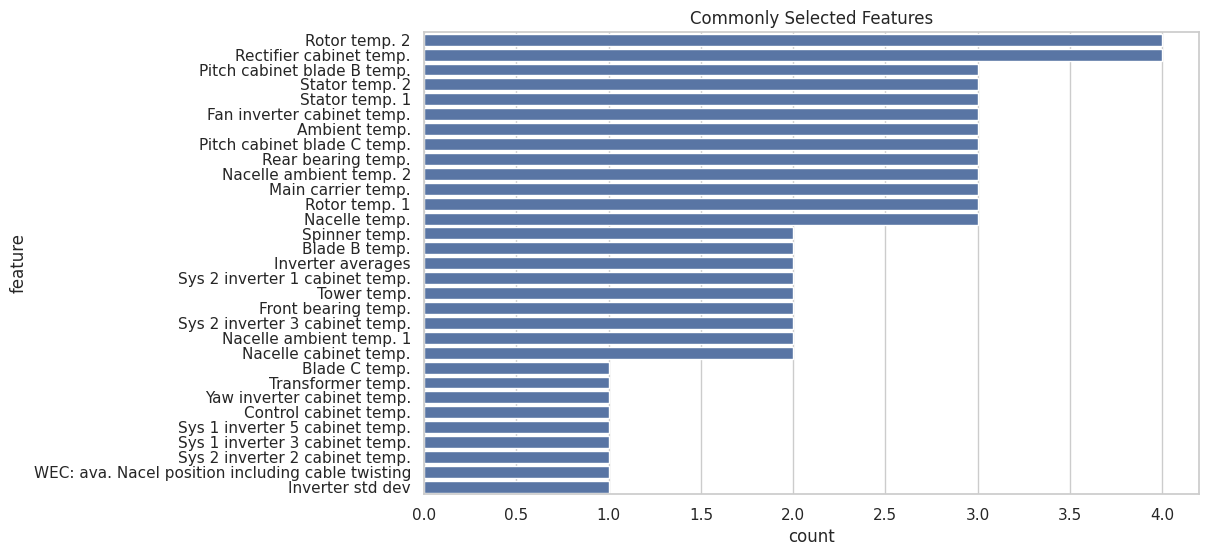

In [193]:
# prompt: common selected features görselleştir

# Create a list of all selected features
all_selected_features = list(set(selected_features_lasso).union(selected_features_rf).union(selected_features_kbest).union(selected_features_xgb))

# Create a dictionary to store the frequency of each feature
feature_counts = {}
for feature in all_selected_features:
    feature_counts[feature] = 0

# Count the number of times each feature is selected
for method in [selected_features_lasso, selected_features_rf, selected_features_kbest, selected_features_xgb]:
    for feature in method:
        feature_counts[feature] += 1

# Create a dataframe with feature names and counts
df_feature_counts = pd.DataFrame({'feature': all_selected_features, 'count': list(feature_counts.values())})

# Sort the dataframe by count
df_feature_counts = df_feature_counts.sort_values('count', ascending=False)

# Create a bar plot of the feature counts
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='feature', data=df_feature_counts)
plt.title('Commonly Selected Features')
plt.show()


In [194]:
# prompt: commonlu selected features 2 ve üzeri olan featureleri common_selected olarak ata

common_selected = df_feature_counts[df_feature_counts['count'] >= 3]['feature'].to_list()


In [195]:
common_selected

['Rotor temp. 2',
 'Rectifier cabinet temp.',
 'Pitch cabinet blade B temp.',
 'Stator temp. 2',
 'Stator temp. 1',
 'Fan inverter cabinet temp.',
 'Ambient temp.',
 'Pitch cabinet blade C temp.',
 'Rear bearing temp.',
 'Nacelle ambient temp. 2',
 'Main carrier temp.',
 'Rotor temp. 1',
 'Nacelle temp.']

In [196]:
my_dict = {}
my_list = common_selected                  #kbest                            #my_list = selectlist
my_tuple = tuple(my_list)
my_dict[my_tuple] = "value"
my_tuple

('Rotor temp. 2',
 'Rectifier cabinet temp.',
 'Pitch cabinet blade B temp.',
 'Stator temp. 2',
 'Stator temp. 1',
 'Fan inverter cabinet temp.',
 'Ambient temp.',
 'Pitch cabinet blade C temp.',
 'Rear bearing temp.',
 'Nacelle ambient temp. 2',
 'Main carrier temp.',
 'Rotor temp. 1',
 'Nacelle temp.')

In [197]:
x_new = x_new.reindex(columns = my_tuple)
x_new

,Rotor temp. 2,Rectifier cabinet temp.,Pitch cabinet blade B temp.,Stator temp. 2,Stator temp. 1,Fan inverter cabinet temp.,Ambient temp.,Pitch cabinet blade C temp.,Rear bearing temp.,Nacelle ambient temp. 2,Main carrier temp.,Rotor temp. 1,Nacelle temp.
DateTime_x,,,,,,,,,,,,,
2014-05-17 02:30:00,0.370968,0.739130,0.673077,0.512821,0.516949,0.790698,0.342857,0.666667,0.714286,0.481481,0.642857,0.362903,0.580645
2014-05-17 06:09:00,0.370968,0.760870,0.653846,0.504274,0.508475,0.744186,0.400000,0.647059,0.714286,0.444444,0.571429,0.370968,0.548387
2014-05-17 08:20:00,0.362903,0.847826,0.692308,0.444444,0.440678,0.744186,0.628571,0.686275,0.714286,0.592593,0.607143,0.354839,0.645161
2014-05-17 08:39:00,0.354839,0.847826,0.692308,0.435897,0.432203,0.744186,0.571429,0.705882,0.714286,0.592593,0.607143,0.354839,0.645161
2014-05-18 10:00:00,0.354839,0.739130,0.711538,0.495726,0.500000,0.697674,0.428571,0.705882,0.714286,0.444444,0.535714,0.354839,0.516129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 14:29:00,0.314516,0.717391,0.788462,0.350427,0.347458,0.674419,0.342857,0.803922,0.642857,0.481481,0.500000,0.314516,0.580645
2015-04-08 15:09:00,0.354839,0.717391,0.788462,0.384615,0.389831,0.697674,0.342857,0.803922,0.642857,0.481481,0.500000,0.354839,0.548387
2015-04-08 16:30:00,0.411290,0.739130,0.769231,0.470085,0.466102,0.720930,0.342857,0.764706,0.666667,0.481481,0.535714,0.411290,0.612903


In [198]:
#x_new= x_new.loc[:, ['Stator temp. 1','Stator temp. 2','Rotor temp. 1','Rotor temp. 2']]
#x_new= x_new.loc[:, ['WEC: ava. windspeed','WEC: ava. blade angle A','Stator temp. 1','Stator temp. 2','Rotor temp. 1','Rotor temp. 2']]

In [199]:
x_new['Fault']=data_af['Fault']

In [200]:
data_af=x_new

In [201]:
corr_matrixx = data_af.corr()
corr_matrixx['Fault'].sort_values(ascending=False)

Fault                          1.000000
Nacelle ambient temp. 2        0.012060
Ambient temp.                  0.009435
Nacelle temp.                 -0.002704
Main carrier temp.            -0.008904
Pitch cabinet blade C temp.   -0.018187
Pitch cabinet blade B temp.   -0.018731
Fan inverter cabinet temp.    -0.019293
Rectifier cabinet temp.       -0.026587
Rotor temp. 2                 -0.036926
Rotor temp. 1                 -0.036999
Rear bearing temp.            -0.040283
Stator temp. 2                -0.044073
Stator temp. 1                -0.044303
Name: Fault, dtype: float64

In [202]:
data_af

,Rotor temp. 2,Rectifier cabinet temp.,Pitch cabinet blade B temp.,Stator temp. 2,Stator temp. 1,Fan inverter cabinet temp.,Ambient temp.,Pitch cabinet blade C temp.,Rear bearing temp.,Nacelle ambient temp. 2,Main carrier temp.,Rotor temp. 1,Nacelle temp.,Fault
DateTime_x,,,,,,,,,,,,,,
2014-05-17 02:30:00,0.370968,0.739130,0.673077,0.512821,0.516949,0.790698,0.342857,0.666667,0.714286,0.481481,0.642857,0.362903,0.580645,0
2014-05-17 06:09:00,0.370968,0.760870,0.653846,0.504274,0.508475,0.744186,0.400000,0.647059,0.714286,0.444444,0.571429,0.370968,0.548387,0
2014-05-17 08:20:00,0.362903,0.847826,0.692308,0.444444,0.440678,0.744186,0.628571,0.686275,0.714286,0.592593,0.607143,0.354839,0.645161,0
2014-05-17 08:39:00,0.354839,0.847826,0.692308,0.435897,0.432203,0.744186,0.571429,0.705882,0.714286,0.592593,0.607143,0.354839,0.645161,0
2014-05-18 10:00:00,0.354839,0.739130,0.711538,0.495726,0.500000,0.697674,0.428571,0.705882,0.714286,0.444444,0.535714,0.354839,0.516129,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 14:29:00,0.314516,0.717391,0.788462,0.350427,0.347458,0.674419,0.342857,0.803922,0.642857,0.481481,0.500000,0.314516,0.580645,0
2015-04-08 15:09:00,0.354839,0.717391,0.788462,0.384615,0.389831,0.697674,0.342857,0.803922,0.642857,0.481481,0.500000,0.354839,0.548387,0
2015-04-08 16:30:00,0.411290,0.739130,0.769231,0.470085,0.466102,0.720930,0.342857,0.764706,0.666667,0.481481,0.535714,0.411290,0.612903,0


In [203]:
# prompt: Timestamp tarih sırasına koy

data_af = data_af.sort_values(by='DateTime_x', ascending=True)
data_af

,Rotor temp. 2,Rectifier cabinet temp.,Pitch cabinet blade B temp.,Stator temp. 2,Stator temp. 1,Fan inverter cabinet temp.,Ambient temp.,Pitch cabinet blade C temp.,Rear bearing temp.,Nacelle ambient temp. 2,Main carrier temp.,Rotor temp. 1,Nacelle temp.,Fault
DateTime_x,,,,,,,,,,,,,,
2014-05-17 02:30:00,0.370968,0.739130,0.673077,0.512821,0.516949,0.790698,0.342857,0.666667,0.714286,0.481481,0.642857,0.362903,0.580645,0
2014-05-17 06:09:00,0.370968,0.760870,0.653846,0.504274,0.508475,0.744186,0.400000,0.647059,0.714286,0.444444,0.571429,0.370968,0.548387,0
2014-05-17 08:20:00,0.362903,0.847826,0.692308,0.444444,0.440678,0.744186,0.628571,0.686275,0.714286,0.592593,0.607143,0.354839,0.645161,0
2014-05-17 08:39:00,0.354839,0.847826,0.692308,0.435897,0.432203,0.744186,0.571429,0.705882,0.714286,0.592593,0.607143,0.354839,0.645161,0
2014-05-18 10:00:00,0.354839,0.739130,0.711538,0.495726,0.500000,0.697674,0.428571,0.705882,0.714286,0.444444,0.535714,0.354839,0.516129,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 14:29:00,0.314516,0.717391,0.788462,0.350427,0.347458,0.674419,0.342857,0.803922,0.642857,0.481481,0.500000,0.314516,0.580645,0
2015-04-08 15:09:00,0.354839,0.717391,0.788462,0.384615,0.389831,0.697674,0.342857,0.803922,0.642857,0.481481,0.500000,0.354839,0.548387,0
2015-04-08 16:30:00,0.411290,0.739130,0.769231,0.470085,0.466102,0.720930,0.342857,0.764706,0.666667,0.481481,0.535714,0.411290,0.612903,0


In [204]:
last_40percent = round(len(data_af) - len(data_af)*perc)
trainhy = data_af.iloc[ :last_40percent, :]
testhy= data_af.iloc[last_40percent: ,:]

In [205]:
sutun=trainhy.shape[1]
sensor_cols = trainhy.iloc[:,0:sutun-1]
broken_rows = trainhy[trainhy['Fault']==1]
normal_rows = trainhy[trainhy['Fault']==0]
machine_status_col = trainhy['Fault']

In [206]:
sensor_cols = trainhy.iloc[:,0:sutun-1]


In [207]:
sensor_cols

,Rotor temp. 2,Rectifier cabinet temp.,Pitch cabinet blade B temp.,Stator temp. 2,Stator temp. 1,Fan inverter cabinet temp.,Ambient temp.,Pitch cabinet blade C temp.,Rear bearing temp.,Nacelle ambient temp. 2,Main carrier temp.,Rotor temp. 1,Nacelle temp.
DateTime_x,,,,,,,,,,,,,
2014-05-17 02:30:00,0.370968,0.739130,0.673077,0.512821,0.516949,0.790698,0.342857,0.666667,0.714286,0.481481,0.642857,0.362903,0.580645
2014-05-17 06:09:00,0.370968,0.760870,0.653846,0.504274,0.508475,0.744186,0.400000,0.647059,0.714286,0.444444,0.571429,0.370968,0.548387
2014-05-17 08:20:00,0.362903,0.847826,0.692308,0.444444,0.440678,0.744186,0.628571,0.686275,0.714286,0.592593,0.607143,0.354839,0.645161
2014-05-17 08:39:00,0.354839,0.847826,0.692308,0.435897,0.432203,0.744186,0.571429,0.705882,0.714286,0.592593,0.607143,0.354839,0.645161
2014-05-18 10:00:00,0.354839,0.739130,0.711538,0.495726,0.500000,0.697674,0.428571,0.705882,0.714286,0.444444,0.535714,0.354839,0.516129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-11-22 16:09:00,0.354839,0.695652,0.634615,0.512821,0.508475,0.697674,0.314286,0.627451,0.642857,0.370370,0.571429,0.354839,0.516129
2014-11-22 17:49:00,0.362903,0.717391,0.634615,0.470085,0.466102,0.674419,0.257143,0.627451,0.666667,0.333333,0.535714,0.362903,0.516129
2014-11-23 00:19:00,0.403226,0.695652,0.596154,0.487179,0.491525,0.604651,0.171429,0.588235,0.666667,0.222222,0.428571,0.403226,0.387097


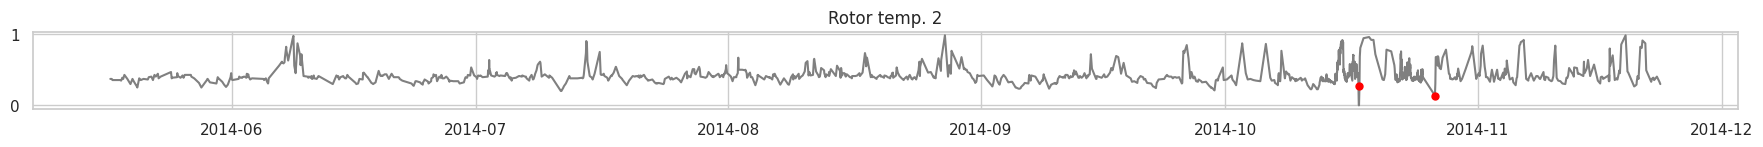

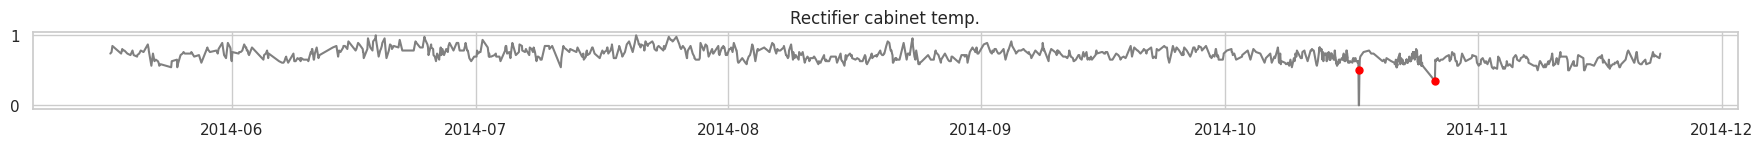

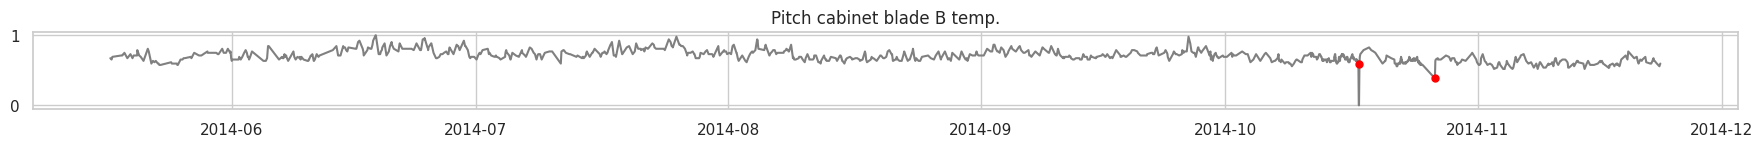

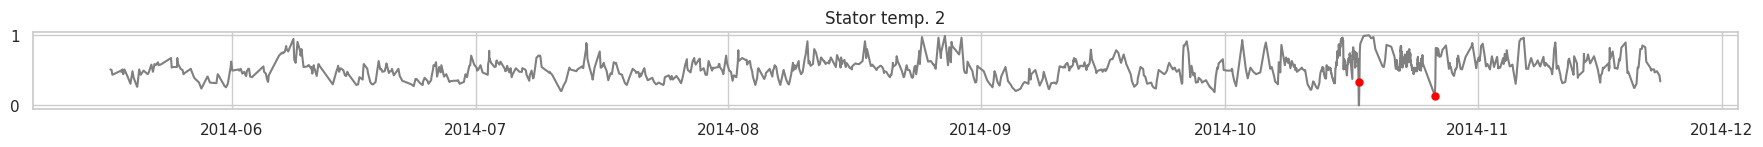

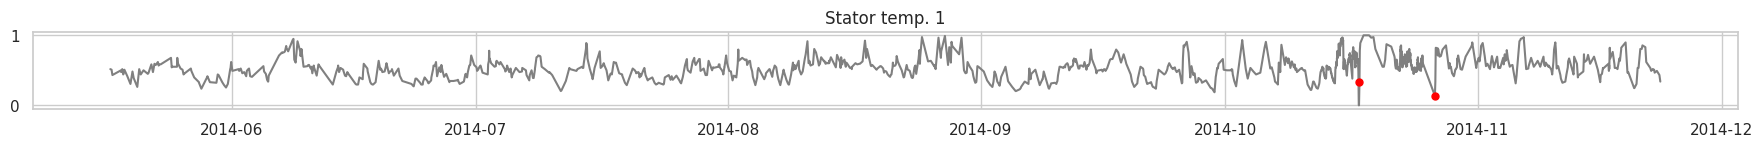

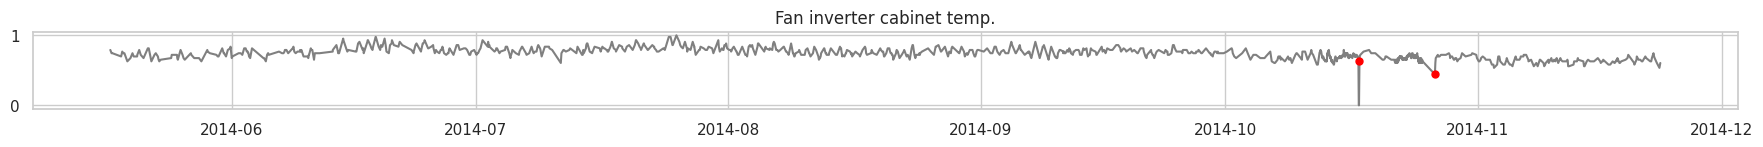

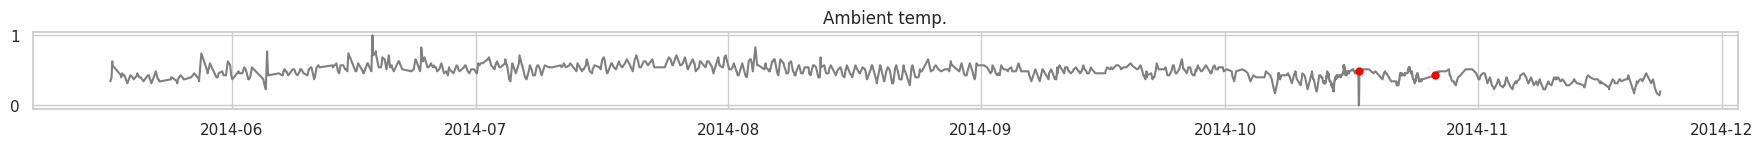

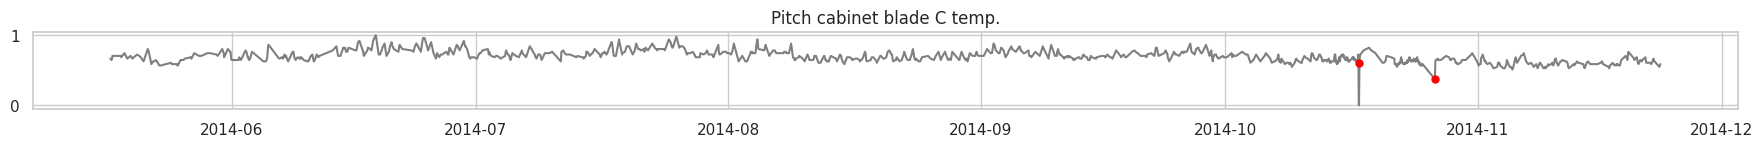

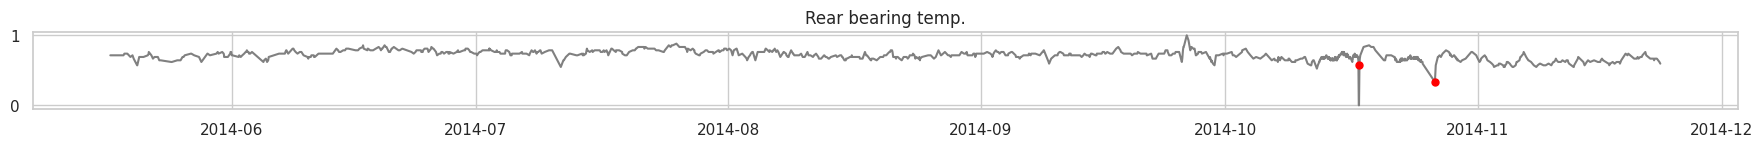

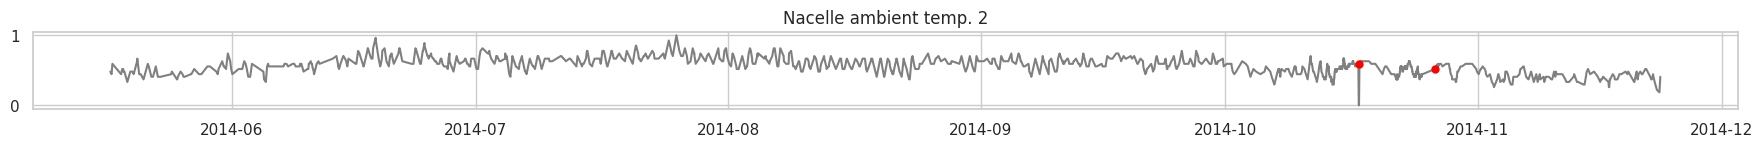

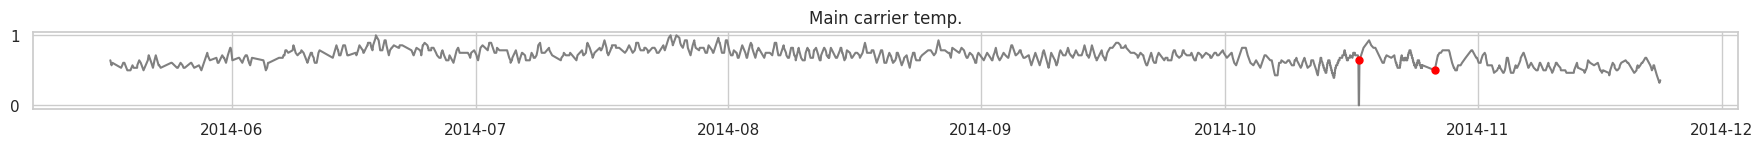

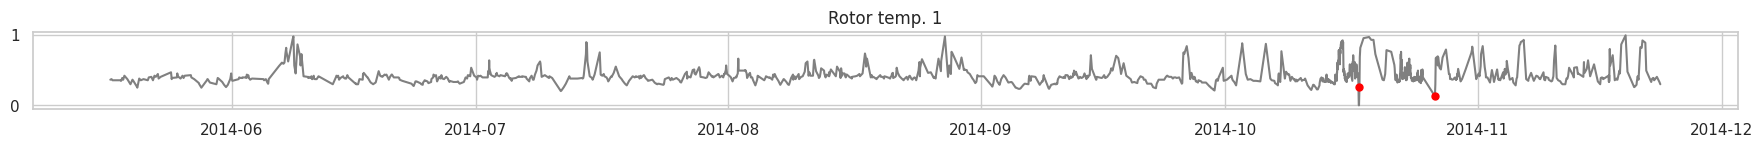

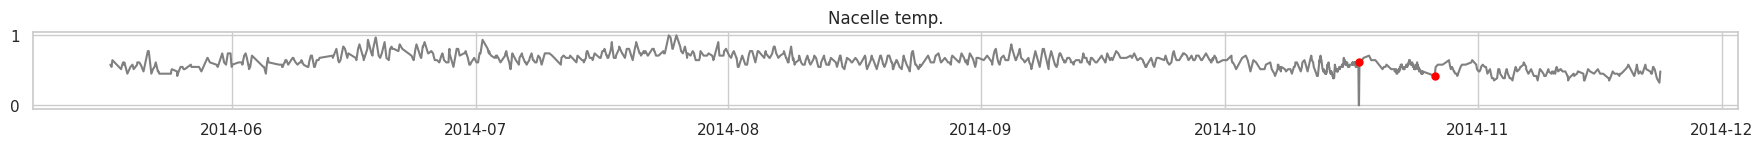

In [208]:
for sensor in sensor_cols:
    plot = plt.figure(figsize=(22,1))
    plot = plt.plot(trainhy[sensor], color='grey')
    plot = plt.plot(broken_rows[sensor], linestyle='none', marker='.', color='red', markersize=10)
    plot = plt.title(sensor)
    plt.xlim()

    plt.show()

In [209]:
train=trainhy.drop(columns=['Fault'])
test=testhy.drop(columns=['Fault'])

In [210]:
train

,Rotor temp. 2,Rectifier cabinet temp.,Pitch cabinet blade B temp.,Stator temp. 2,Stator temp. 1,Fan inverter cabinet temp.,Ambient temp.,Pitch cabinet blade C temp.,Rear bearing temp.,Nacelle ambient temp. 2,Main carrier temp.,Rotor temp. 1,Nacelle temp.
DateTime_x,,,,,,,,,,,,,
2014-05-17 02:30:00,0.370968,0.739130,0.673077,0.512821,0.516949,0.790698,0.342857,0.666667,0.714286,0.481481,0.642857,0.362903,0.580645
2014-05-17 06:09:00,0.370968,0.760870,0.653846,0.504274,0.508475,0.744186,0.400000,0.647059,0.714286,0.444444,0.571429,0.370968,0.548387
2014-05-17 08:20:00,0.362903,0.847826,0.692308,0.444444,0.440678,0.744186,0.628571,0.686275,0.714286,0.592593,0.607143,0.354839,0.645161
2014-05-17 08:39:00,0.354839,0.847826,0.692308,0.435897,0.432203,0.744186,0.571429,0.705882,0.714286,0.592593,0.607143,0.354839,0.645161
2014-05-18 10:00:00,0.354839,0.739130,0.711538,0.495726,0.500000,0.697674,0.428571,0.705882,0.714286,0.444444,0.535714,0.354839,0.516129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-11-22 16:09:00,0.354839,0.695652,0.634615,0.512821,0.508475,0.697674,0.314286,0.627451,0.642857,0.370370,0.571429,0.354839,0.516129
2014-11-22 17:49:00,0.362903,0.717391,0.634615,0.470085,0.466102,0.674419,0.257143,0.627451,0.666667,0.333333,0.535714,0.362903,0.516129
2014-11-23 00:19:00,0.403226,0.695652,0.596154,0.487179,0.491525,0.604651,0.171429,0.588235,0.666667,0.222222,0.428571,0.403226,0.387097


In [211]:
test

,Rotor temp. 2,Rectifier cabinet temp.,Pitch cabinet blade B temp.,Stator temp. 2,Stator temp. 1,Fan inverter cabinet temp.,Ambient temp.,Pitch cabinet blade C temp.,Rear bearing temp.,Nacelle ambient temp. 2,Main carrier temp.,Rotor temp. 1,Nacelle temp.
DateTime_x,,,,,,,,,,,,,
2014-11-23 11:29:00,0.298387,0.782609,0.615385,0.316239,0.322034,0.651163,0.228571,0.607843,0.595238,0.370370,0.392857,0.290323,0.548387
2014-11-23 13:39:00,0.282258,0.826087,0.673077,0.299145,0.296610,0.697674,0.285714,0.666667,0.595238,0.407407,0.464286,0.282258,0.580645
2014-11-23 14:01:00,0.290323,0.826087,0.673077,0.299145,0.305085,0.697674,0.285714,0.666667,0.619048,0.370370,0.464286,0.290323,0.580645
2014-11-23 14:30:00,0.290323,0.826087,0.692308,0.299145,0.296610,0.697674,0.285714,0.686275,0.619048,0.370370,0.500000,0.282258,0.580645
2014-11-23 15:09:00,0.290323,0.804348,0.692308,0.299145,0.296610,0.697674,0.285714,0.686275,0.619048,0.370370,0.500000,0.282258,0.580645
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 14:29:00,0.314516,0.717391,0.788462,0.350427,0.347458,0.674419,0.342857,0.803922,0.642857,0.481481,0.500000,0.314516,0.580645
2015-04-08 15:09:00,0.354839,0.717391,0.788462,0.384615,0.389831,0.697674,0.342857,0.803922,0.642857,0.481481,0.500000,0.354839,0.548387
2015-04-08 16:30:00,0.411290,0.739130,0.769231,0.470085,0.466102,0.720930,0.342857,0.764706,0.666667,0.481481,0.535714,0.411290,0.612903


In [212]:
scaler = preprocessing.MinMaxScaler()
# normalize the data

X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
scaler_filename = "scaler_data"
joblib.dump(scaler, scaler_filename)

['scaler_data']

In [213]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0],1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (2096, 1, 13)
Test data shape: (899, 1, 13)


In [214]:
# define the autoencoder network model
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model



**Loss:** Eğitim sırasında modelin tahminleri ile gerçek değerler arasındaki ortalama hatayı ifade eder. Modelin tahminleri gerçek değerlere ne kadar yakınsa, loss değeri o kadar düşük olur.

**Val_loss:** Doğrulama sırasında modelin tahminleri ile gerçek değerler arasındaki ortalama hatayı ifade eder. Modelin tahminleri gerçek değerlere ne kadar yakınsa, val_loss değeri o kadar düşük olur.

Loss ve val_loss değerleri, modelin performansını değerlendirmek için kullanılır. Loss değeri, modelin eğitim verilerindeki performansını gösterirken, val_loss değeri, modelin yeni verilerdeki performansını gösterir. Val_loss değeri, modelin aşırı öğrenmesini önlemek için de kullanılır. Modelin val_loss değeri eğitim sırasında artmaya başlarsa, model aşırı öğrenmeye başlamış demektir ve eğitimi durdurmak gerekir.


In [215]:
# prompt: relu yerine farklı fonksiyonları kullan

model4 = Sequential()

model4.add(GRU(16, activation='tanh', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00), input_shape=(X_train.shape[1], X_train.shape[2])))
model4.add(GRU(4, activation='tanh', return_sequences=False))
model4.add(RepeatVector(X_train.shape[1]))
model4.add(GRU(4, activation='tanh', return_sequences=True))
model4.add(GRU(16, activation='tanh', return_sequences=True))
model4.add(TimeDistributed(Dense(X_train.shape[2])))
model4.compile(optimizer='adam', loss='mae')
model4.summary()

# fit the model to the data
history4=History()
nb_epochs = 100
batch_size = 5
history4 = model4.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                  validation_split=0.05, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')], shuffle=False).history


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 1, 16)             1488      
                                                                 
 gru_5 (GRU)                 (None, 4)                 264       
                                                                 
 repeat_vector_1 (RepeatVec  (None, 1, 4)              0         
 tor)                                                            
                                                                 
 gru_6 (GRU)                 (None, 1, 4)              120       
                                                                 
 gru_7 (GRU)                 (None, 1, 16)             1056      
                                                                 
 time_distributed_1 (TimeDi  (None, 1, 13)             221       
 stributed)                                           

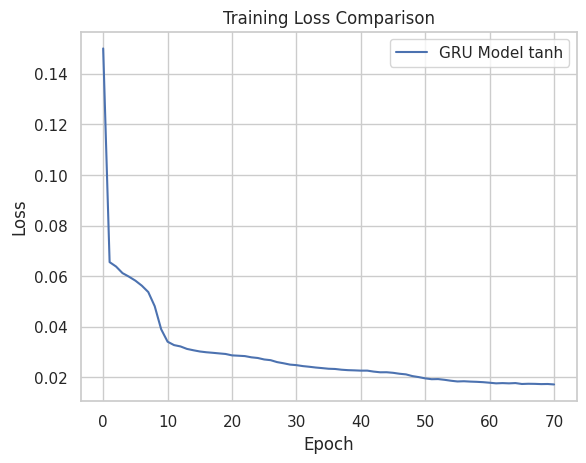

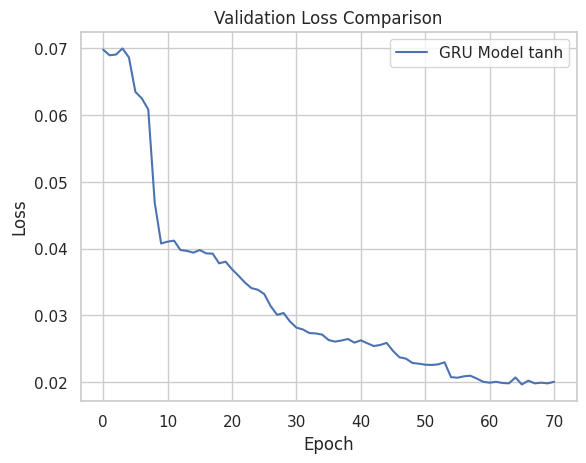

In [216]:
# prompt: history1,history2,history3,history4  kıyasla

# Compare the training loss of each model

plt.plot(history4['loss'], label='GRU Model tanh')

plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Compare the validation loss of each model

plt.plot(history4['val_loss'], label='GRU Model tanh')

plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




In [217]:
history=history4
model=model4

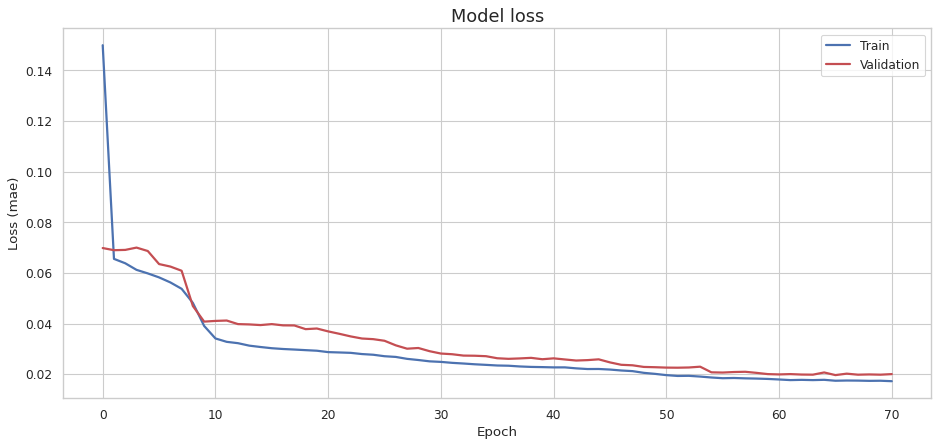

In [218]:
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [315]:
# plot the loss distribution of the training set
X_pred = model.predict(X_train)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)
#plt.figure(figsize=(16,9), dpi=80)
#plt.title('Loss Distribution', fontsize=16)
#sns.distplot(scored['Loss_mae'], bins = 20, kde= True, color = 'blue');
#plt.xlim([0.0,.5])

66/66 [==============================] - 0s 3ms/step


Otomatik olarak belirlenen eşik değeri: 0.050562035672222436


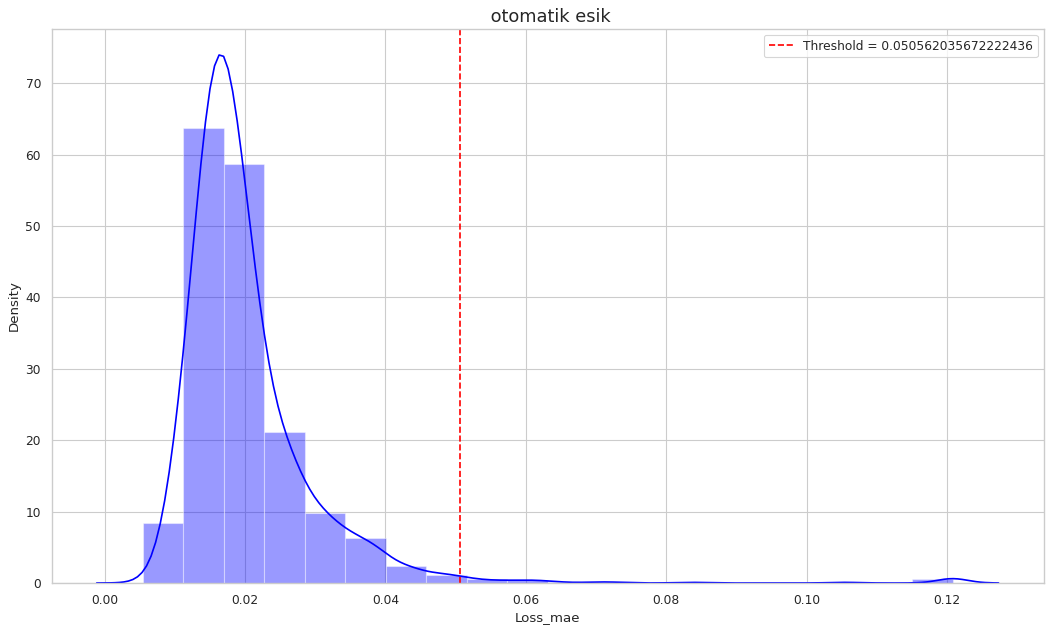

In [316]:
# Kayıp değerlerini alın
loss_values = scored['Loss_mae'].values

# Kayıp değerlerinin z-skorlarını hesaplayın
z_scores = (loss_values - np.mean(loss_values)) / np.std(loss_values)

# Eşik değeri için bir z-score belirleyin
threshold_z_score = 3 # Örnek olarak, 3.0 z-score'u kullanıyoruz

# Eşik değeri hesaplayın
threshold_value = np.mean(loss_values) + threshold_z_score * np.std(loss_values)

# Eşik değeri görselleştirin
plt.figure(figsize=(16, 9), dpi=80)
plt.title(' otomatik esik', fontsize=16)
sns.distplot(scored['Loss_mae'], bins=20, kde=True, color='blue')
plt.axvline(x=threshold_value, color='red', linestyle='--', label=f'Threshold = {threshold_value}')
plt.legend()


# Eşik değerini ve tespit edilen anomalileri yazdırın
print(f"Otomatik olarak belirlenen eşik değeri: {threshold_value}")

In [317]:
# prompt: scored['Loss_mae'] nin threshold dan büyük olduğu değerleri anomali olarak tespit et, machine_status_col ile karşılaştır doğrulıuğu hesapla



# Anomali tespiti için eşik değeri kullanın
anomalies = scored[scored['Loss_mae'] > threshold_value]
anomalies_index = anomalies.index.tolist()

# Makine durumu sütunundan gerçek arızaları alın
true_faults = machine_status_col[machine_status_col == 1]
true_faults_index = true_faults.index.tolist()

# Gerçek arızalarla tespit edilen anomalileri karşılaştırın
correct_detections = len(set(true_faults_index).intersection(anomalies_index))

# Doğruluk oranını hesaplayın
accuracy = correct_detections / len(true_faults) * 100

TP = len(set(true_faults_index).intersection(anomalies_index))
FP = len(anomalies_index) - TP
TN = len(train) - len(true_faults) - FP
FN = len(true_faults) - TP

# Calculate the accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate the recall
recall = TP / (TP + FN)

# Calculate the precision
precision = TP / (TP + FP)

# Calculate the F1 score
f1_score = 2 * ((precision*recall)/ (precision + recall))

# Print the confusion matrix
print("Confusion Matrix:")
print(f"TP: {TP}")
print(f"FP: {FP}")
print(f"TN: {TN}")
print(f"FN: {FN}")
# Print the results
print("Accuracy:", accuracy)
print("F1 Score:", f1_score)
print("Recall:", recall)
print("Precision:", precision)




Confusion Matrix:
TP: 2
FP: 23
TN: 2071
FN: 0
Accuracy: 0.9890267175572519
F1 Score: 0.14814814814814814
Recall: 1.0
Precision: 0.08


In [318]:
scored

,Loss_mae
DateTime_x,
2014-05-17 02:30:00,0.023661
2014-05-17 06:09:00,0.020692
2014-05-17 08:20:00,0.037884
2014-05-17 08:39:00,0.032311
2014-05-18 10:00:00,0.031824
...,...
2014-11-22 16:09:00,0.021517
2014-11-22 17:49:00,0.022772
2014-11-23 00:19:00,0.017464


In [319]:
true_faults

DateTime_x
2014-10-17 11:49:00    1
2014-10-26 18:10:00    1
Name: Fault, dtype: int64

In [320]:
# prompt: optimum eşik değerini belirlemek için F1 skoru kullan

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
# Initialize variables
best_threshold = 0
best_f1_score = 0
best_accuracy_score = 0
# Loop through different threshold values
# Define a range of threshold values to evaluate
threshold_range = np.arange(0.005, 0.5, 0.01)

# Loop through each threshold value
for threshold in threshold_range:
    # Apply the threshold to the loss values
    predicted_anomalies = (loss_values > threshold)

    # Calculate the F1 score
    f1_score_current = f1_score(machine_status_col, predicted_anomalies)
    acc_score_current = accuracy_score(machine_status_col, predicted_anomalies)
    # Update the best threshold and F1 score if necessary
    if f1_score_current > best_f1_score:
        best_threshold = threshold
        best_f1_score = f1_score_current
        best_accuracy_score = acc_score_current
# Print the best threshold and F1 score
print(f"Best threshold: {best_threshold}")
print(f"Best F1 score: {best_f1_score}")
print(f"Best Accuracy score: {best_accuracy_score}")


Best threshold: 0.08499999999999999
Best F1 score: 0.2
Best Accuracy score: 0.9961832061068703


In [321]:
# prompt: yukarıdaki sonuçlara göre TP,FP,TN,FN hesapla

TP = len(set(true_faults_index).intersection(anomalies_index))
FP = len(anomalies_index) - TP
TN = len(train) - len(true_faults) - FP
FN = len(true_faults) - TP


In [322]:
anomalies_index

[Timestamp('2014-05-28 06:50:00'),
 Timestamp('2014-06-05 08:30:00'),
 Timestamp('2014-06-18 07:09:00'),
 Timestamp('2014-07-11 10:10:00'),
 Timestamp('2014-07-14 15:01:00'),
 Timestamp('2014-08-04 07:30:00'),
 Timestamp('2014-08-10 17:00:00'),
 Timestamp('2014-08-17 18:30:00'),
 Timestamp('2014-08-24 18:30:00'),
 Timestamp('2014-08-26 19:10:00'),
 Timestamp('2014-08-29 15:01:00'),
 Timestamp('2014-08-30 00:49:00'),
 Timestamp('2014-09-26 11:59:00'),
 Timestamp('2014-09-26 17:09:00'),
 Timestamp('2014-10-16 15:01:00'),
 Timestamp('2014-10-17 09:30:00'),
 Timestamp('2014-10-17 09:38:00'),
 Timestamp('2014-10-17 09:49:00'),
 Timestamp('2014-10-17 10:00:00'),
 Timestamp('2014-10-17 10:10:00'),
 Timestamp('2014-10-17 10:19:00'),
 Timestamp('2014-10-17 10:30:00'),
 Timestamp('2014-10-17 11:49:00'),
 Timestamp('2014-10-18 16:09:00'),
 Timestamp('2014-10-26 18:10:00')]

In [323]:
# prompt: yukarıdaki kodu PSO optimizasyon algoritması ile yaz

import random
import numpy as np
from sklearn.metrics import f1_score, accuracy_score



def PSO(loss_values, machine_status_col, max_iter, num_particles, c1, c2, w):
  # Initialize the particles
  positions = np.random.uniform(0.005, 0.5, (num_particles, 1))
  velocities = np.random.uniform(-0.5, 0.5, (num_particles, 1))
  personal_best_positions = positions.copy()
  personal_best_f1_scores = np.zeros(num_particles)
  # Initialize the global best position to the first element of positions
  global_best_position = positions[0]
  global_best_f1_score = 0

  # Iterate for the maximum number of iterations
  for i in range(max_iter):
    # Update the velocities and positions of the particles
    new_velocities = w * velocities + c1 * random.random() * (personal_best_positions - positions) + c2 * random.random() * (global_best_position - positions)
    new_positions = positions + new_velocities

    # Evaluate the F1 score for each particle
    f1_scores = np.zeros(num_particles)
    for j in range(num_particles):
      predicted_anomalies = (loss_values > new_positions[j])
      f1_scores[j] = f1_score(machine_status_col, predicted_anomalies)



    # Update the personal best positions and F1 scores
    for j in range(num_particles):
      if f1_scores[j] > personal_best_f1_scores[j]:
        personal_best_positions[j] = new_positions[j]
        personal_best_f1_scores[j] = f1_scores[j]

    # Update the global best position and F1 score
    best_f1_score_index = np.argmax(f1_scores)
    if f1_scores[best_f1_score_index] > global_best_f1_score:
      global_best_position = new_positions[best_f1_score_index]
      global_best_f1_score = f1_scores[best_f1_score_index]

    # Update the velocities and positions
    velocities = new_velocities
    positions = new_positions

  # Return the best threshold and F1 score
  return global_best_position, global_best_f1_score

# Use the PSO algorithm to find the best threshold
best_threshold, best_f1_score = PSO(loss_values, machine_status_col, max_iter=100, num_particles=50, c1=1.4, c2=1.4, w=0.7)

# Print the best threshold and F1 score
print(f"Best threshold: {best_threshold}")
print(f"Best F1 score: {best_f1_score}")



Best threshold: [0.08795638]
Best F1 score: 0.2


In [324]:
# prompt: best_threshold to float

best_threshold = float(best_threshold)


In [325]:
best_threshold

0.08795638412330326

In [326]:
# Anomali tespiti için eşik değeri kullanın
anomalies = scored[scored['Loss_mae'] > best_threshold]
anomalies_index = anomalies.index.tolist()

# Makine durumu sütunundan gerçek arızaları alın
true_faults = machine_status_col[machine_status_col == 1]
true_faults_index = true_faults.index.tolist()

# Gerçek arızalarla tespit edilen anomalileri karşılaştırın
correct_detections = len(set(true_faults_index).intersection(anomalies_index))

# Doğruluk oranını hesaplayın
accuracy = correct_detections / len(true_faults) * 100

TP = len(set(true_faults_index).intersection(anomalies_index))
FP = len(anomalies_index) - TP
TN = len(train) - len(true_faults) - FP
FN = len(true_faults) - TP

# Calculate the accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate the recall
recall = TP / (TP + FN)

# Calculate the precision
precision = TP / (TP + FP)

# Calculate the F1 score
f1_score = 2 * ((precision*recall)/ (precision + recall))

# Print the confusion matrix
print("Confusion Matrix:")
print(f"TP: {TP}")
print(f"FP: {FP}")
print(f"TN: {TN}")
print(f"FN: {FN}")
# Print the results
print("Accuracy:", accuracy)
print("F1 Score:", f1_score)
print("Recall:", recall)
print("Precision:", precision)

Confusion Matrix:
TP: 1
FP: 7
TN: 2087
FN: 1
Accuracy: 0.9961832061068703
F1 Score: 0.2
Recall: 0.5
Precision: 0.125


# z skoru nedir nasıl hesaplanır

Z skoru, bir veri noktasının ortalamadan kaç standart sapma uzaklıkta olduğunu gösteren bir ölçüdür. Z skoru hesaplamak için, önce veri noktasının ortalamasını ve standart sapmasını bulmanız gerekir. Daha sonra, veri noktasını ortalamadan çıkarıp standart sapmaya bölerek z skorunu hesaplayabilirsiniz.

Z skoru = (veri noktası - ortalama) / standart sapma

Örneğin, bir veri noktası 100, ortalama 50 ve standart sapma 10 ise, z skoru 5 olacaktır. Bu, veri noktasının ortalamadan 5 standart sapma uzaklıkta olduğunu göstermektedir.

Z skorları, veri noktalarını karşılaştırmak ve aykırı değerleri tespit etmek için kullanılabilir. Örneğin, bir veri kümesindeki z skoru 3'ten büyük olan veri noktaları aykırı değerler olarak kabul edilebilir.

Z skorları, ayrıca, veri kümelerinin normal dağılımını belirlemek için de kullanılabilir. Normal dağılımlı bir veri kümesinde, veri noktalarının çoğu ortalamaya yakın olacaktır ve z skorları 0'a yakın olacaktır. Ancak, normal dağılımlı olmayan bir veri kümesinde, veri noktaları ortalamaya daha yayılmış olacaktır ve z skorları daha yüksek olacaktır.


In [327]:
# calculate the loss on the test set

TRH=best_threshold
TRH2=TRH/1.5

X_pred = model.predict(X_test)
X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
X_pred = pd.DataFrame(X_pred, columns=test.columns)
X_pred.index = test.index

scored = pd.DataFrame(index=test.index)

29/29 [==============================] - 0s 3ms/step


In [328]:
scored

""
DateTime_x
2014-11-23 11:29:00
2014-11-23 13:39:00
2014-11-23 14:01:00
2014-11-23 14:30:00
2014-11-23 15:09:00
...
2015-04-08 14:29:00
2015-04-08 15:09:00
2015-04-08 16:30:00


In [329]:
# calculate the loss on the test set

Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored['Threshold'] = TRH
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
scored.head()

,Loss_mae,Threshold,Anomaly
DateTime_x,,,
2014-11-23 11:29:00,0.044259,0.087956,False
2014-11-23 13:39:00,0.039745,0.087956,False
2014-11-23 14:01:00,0.038664,0.087956,False
2014-11-23 14:30:00,0.035757,0.087956,False
2014-11-23 15:09:00,0.033522,0.087956,False


In [330]:
lossc=np.mean(np.abs(X_pred-Xtest), axis = 1)
lossc=pd.DataFrame(lossc)

lossc['ema']= lossc.rolling(21, min_periods=1).mean()
lossc['dtres']=lossc['ema']/2+TRH2
#lossc['dtres']=lossc['ema']+TRH
lossc

,0,ema,dtres
DateTime_x,,,
2014-11-23 11:29:00,0.044259,0.044259,0.080767
2014-11-23 13:39:00,0.039745,0.042002,0.079638
2014-11-23 14:01:00,0.038664,0.040889,0.079082
2014-11-23 14:30:00,0.035757,0.039606,0.078441
2014-11-23 15:09:00,0.033522,0.038390,0.077832
...,...,...,...
2015-04-08 14:29:00,0.039256,0.037862,0.077568
2015-04-08 15:09:00,0.037126,0.037834,0.077555
2015-04-08 16:30:00,0.032888,0.037762,0.077518


In [331]:
scored0 = pd.DataFrame(index=test.index)
scored0['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)
scored0['Threshold'] = lossc['dtres']
scored0['Anomaly'] = scored0['Loss_mae'] > scored0['Threshold']
scored0.head()

,Loss_mae,Threshold,Anomaly
DateTime_x,,,
2014-11-23 11:29:00,0.044259,0.080767,False
2014-11-23 13:39:00,0.039745,0.079638,False
2014-11-23 14:01:00,0.038664,0.079082,False
2014-11-23 14:30:00,0.035757,0.078441,False
2014-11-23 15:09:00,0.033522,0.077832,False


In [332]:
# calculate the same metrics for the training set
# and merge all data in a single dataframe for plotting
X_pred_train = model.predict(X_train)
X_pred_train = X_pred_train.reshape(X_pred_train.shape[0], X_pred_train.shape[2])
X_pred_train = pd.DataFrame(X_pred_train, columns=train.columns)
X_pred_train.index = train.index

scored_train = pd.DataFrame(index=train.index)
scored_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
scored_train['Threshold'] = TRH
scored_train['Anomaly'] = scored_train['Loss_mae'] > scored_train['Threshold']
scored = pd.concat([scored_train, scored])

66/66 [==============================] - 0s 2ms/step


In [333]:
scored0_train = pd.DataFrame(index=train.index)
scored0_train['Loss_mae'] = np.mean(np.abs(X_pred_train-Xtrain), axis = 1)

lossc1=np.mean(np.abs(X_pred_train-Xtrain), axis = 1)
lossc1=pd.DataFrame(lossc1)

lossc1['ema']= lossc1.rolling(21, min_periods=1).mean()
#lossc1['dtres']=(lossc1[0]-lossc1['ema'])/2+TRH
lossc1['dtres']=lossc1['ema']/2+TRH2

scored0_train['Threshold'] = lossc1['dtres']
scored0_train['Anomaly'] = scored0_train['Loss_mae'] > scored0_train['Threshold']
scored0 = pd.concat([scored0_train, scored0])

In [334]:
#broken_rows2=data_af['Fault']
broken_rows2 = trainhy['Fault']
broken_rows2=pd.DataFrame(broken_rows2)
broken_rows2 = broken_rows2[broken_rows2['Fault']==1]

broken_rows2

,Fault
DateTime_x,
2014-10-17 11:49:00,1
2014-10-26 18:10:00,1


In [335]:
broken_rows2['Loss_mae']=scored['Loss_mae']
broken_rows2['Threshold']=scored['Threshold']

In [336]:
broken_rows2

,Fault,Loss_mae,Threshold
DateTime_x,,,
2014-10-17 11:49:00,1,0.050757,0.087956
2014-10-26 18:10:00,1,0.105389,0.087956


In [337]:
broken_rows20 = trainhy['Fault']
broken_rows20=pd.DataFrame(broken_rows20)
broken_rows20 = broken_rows20[broken_rows20['Fault']==1]
broken_rows20['Loss_mae']=scored0['Loss_mae']
broken_rows20['Threshold']=scored0['Threshold']

In [338]:
broken_rows2=pd.DataFrame(broken_rows2)

broken_rows20=pd.DataFrame(broken_rows20)

In [339]:
scored1=scored
scored10=scored0
broken_rows2=broken_rows2.sort_index()
broken_rows20=broken_rows20.sort_index()

In [340]:
broken_rows2=broken_rows2[['Loss_mae','Fault']]
broken_rows20=broken_rows20[['Loss_mae','Fault']]

In [341]:
scored1=pd.DataFrame(scored1)
scored10=pd.DataFrame(scored10)

scored11=scored1
scored110=scored10

In [342]:
scored11['Anomaly'].replace(False,0, inplace=True)
scored11['Anomaly'].replace(True,1, inplace=True)

scored110['Anomaly'].replace(False,0, inplace=True)
scored110['Anomaly'].replace(True,1, inplace=True)

scored11

,Loss_mae,Threshold,Anomaly
DateTime_x,,,
2014-05-17 02:30:00,0.023661,0.087956,0
2014-05-17 06:09:00,0.020692,0.087956,0
2014-05-17 08:20:00,0.037884,0.087956,0
2014-05-17 08:39:00,0.032311,0.087956,0
2014-05-18 10:00:00,0.031824,0.087956,0
...,...,...,...
2015-04-08 14:29:00,0.039256,0.087956,0
2015-04-08 15:09:00,0.037126,0.087956,0
2015-04-08 16:30:00,0.032888,0.087956,0


In [343]:
scored1 = scored1.iloc[ :last_40percent, :]
scored10 =scored10.iloc[ :last_40percent, :]
scored10

,Loss_mae,Threshold,Anomaly
DateTime_x,,,
2014-05-17 02:30:00,0.023661,0.070468,0
2014-05-17 06:09:00,0.020692,0.069726,0
2014-05-17 08:20:00,0.037884,0.072344,0
2014-05-17 08:39:00,0.032311,0.072956,0
2014-05-18 10:00:00,0.031824,0.073275,0
...,...,...,...
2014-11-22 16:09:00,0.021517,0.071123,0
2014-11-22 17:49:00,0.022772,0.070773,0
2014-11-23 00:19:00,0.017464,0.070457,0


In [344]:
import plotly.express as px
fig = px.scatter(broken_rows2['Loss_mae'], title='anomali tespiti',color_discrete_sequence=['red'])
fig.add_trace(px.line(scored1).data[0])
fig.add_trace(px.line(scored1).data[1])
#fig.add_trace(px.line(scored10).data[1])

fig.show()

In [345]:
last_percent = round(len(scored0) - len(scored0)*perc)
sc_train0 = scored0.iloc[ :last_percent, :]
sc_test0= scored0.iloc[last_percent: ,:]

sc_test0

,Loss_mae,Threshold,Anomaly
DateTime_x,,,
2014-11-23 11:29:00,0.044259,0.080767,False
2014-11-23 13:39:00,0.039745,0.079638,False
2014-11-23 14:01:00,0.038664,0.079082,False
2014-11-23 14:30:00,0.035757,0.078441,False
2014-11-23 15:09:00,0.033522,0.077832,False
...,...,...,...
2015-04-08 14:29:00,0.039256,0.077568,False
2015-04-08 15:09:00,0.037126,0.077555,False
2015-04-08 16:30:00,0.032888,0.077518,False


In [346]:
last_percent = round(len(scored) - len(scored)*perc)
sc_train = scored.iloc[ :last_percent, :]
sc_test= scored.iloc[last_percent: ,:]

sc_test

,Loss_mae,Threshold,Anomaly
DateTime_x,,,
2014-11-23 11:29:00,0.044259,0.087956,False
2014-11-23 13:39:00,0.039745,0.087956,False
2014-11-23 14:01:00,0.038664,0.087956,False
2014-11-23 14:30:00,0.035757,0.087956,False
2014-11-23 15:09:00,0.033522,0.087956,False
...,...,...,...
2015-04-08 14:29:00,0.039256,0.087956,False
2015-04-08 15:09:00,0.037126,0.087956,False
2015-04-08 16:30:00,0.032888,0.087956,False


In [347]:
y_pred=sc_test['Anomaly']

tres=sc_test['Threshold']

y_true=testhy['Fault']

lossm=sc_test['Loss_mae']

y_pred

DateTime_x
2014-11-23 11:29:00    False
2014-11-23 13:39:00    False
2014-11-23 14:01:00    False
2014-11-23 14:30:00    False
2014-11-23 15:09:00    False
                       ...  
2015-04-08 14:29:00    False
2015-04-08 15:09:00    False
2015-04-08 16:30:00    False
2015-04-08 17:09:00    False
2015-04-08 18:00:00    False
Name: Anomaly, Length: 899, dtype: bool

In [348]:
y_pred0=sc_test0['Anomaly']

tres0=sc_test0['Threshold']

y_true0=testhy['Fault']

lossm0=sc_test0['Loss_mae']

In [349]:
y_pred=pd.DataFrame(y_pred)
y_pred1=y_pred['Anomaly'].replace(False, 0, inplace=True)
y_pred1=y_pred['Anomaly'].replace(True, 1, inplace=True)
y_pred0=pd.DataFrame(y_pred0)
y_pred10=y_pred0['Anomaly'].replace(False, 0, inplace=True)
y_pred10=y_pred0['Anomaly'].replace(True, 1, inplace=True)

y_true1=pd.DataFrame(y_true)
y_true2=pd.DataFrame(y_true)
lossm=pd.DataFrame(lossm)
y_true1['loss']=lossm
y_true1= y_true1.reindex(columns=['loss', 'Fault'])

broken_rows1 = y_true1[y_true1['Fault']==1]
broken_rows1=broken_rows1.sort_index()

sc_test1=sc_test
sc_test1['Anomaly'].replace(False, 0, inplace=True)
sc_test1['Anomaly'].replace(True, 1, inplace=True)

In [350]:
y_true10=pd.DataFrame(y_true)
y_true20=pd.DataFrame(y_true)
lossm=pd.DataFrame(lossm)
y_true10['loss']=lossm
y_true10= y_true10.reindex(columns=['loss', 'Fault'])

broken_rows10 = y_true10[y_true10['Fault']==1]
broken_rows10=broken_rows10.sort_index()

sc_test10=sc_test0
sc_test10['Anomaly'].replace(False, 0, inplace=True)
sc_test10['Anomaly'].replace(True, 1, inplace=True)

In [351]:
broken_rows1=pd.DataFrame(broken_rows1)
broken_rows10=pd.DataFrame(broken_rows10)


In [352]:
sc_test10=pd.DataFrame(sc_test10)
sc_test10

,Loss_mae,Threshold,Anomaly
DateTime_x,,,
2014-11-23 11:29:00,0.044259,0.080767,0
2014-11-23 13:39:00,0.039745,0.079638,0
2014-11-23 14:01:00,0.038664,0.079082,0
2014-11-23 14:30:00,0.035757,0.078441,0
2014-11-23 15:09:00,0.033522,0.077832,0
...,...,...,...
2015-04-08 14:29:00,0.039256,0.077568,0
2015-04-08 15:09:00,0.037126,0.077555,0
2015-04-08 16:30:00,0.032888,0.077518,0


In [353]:
sc_test1=pd.DataFrame(sc_test1)
sc_test1

,Loss_mae,Threshold,Anomaly
DateTime_x,,,
2014-11-23 11:29:00,0.044259,0.087956,0
2014-11-23 13:39:00,0.039745,0.087956,0
2014-11-23 14:01:00,0.038664,0.087956,0
2014-11-23 14:30:00,0.035757,0.087956,0
2014-11-23 15:09:00,0.033522,0.087956,0
...,...,...,...
2015-04-08 14:29:00,0.039256,0.087956,0
2015-04-08 15:09:00,0.037126,0.087956,0
2015-04-08 16:30:00,0.032888,0.087956,0


In [354]:
broken_rows2

,Loss_mae,Fault
DateTime_x,,
2014-10-17 11:49:00,0.050757,1
2014-10-26 18:10:00,0.105389,1


In [355]:
import plotly.express as px


fig2 = px.scatter(broken_rows1['loss'], title='anomali tespiti',color_discrete_sequence=['red'])

fig2.add_trace(px.line(sc_test1).data[0])
fig2.add_trace(px.line(sc_test1).data[1])
#fig2.add_trace(px.line(sc_test10).data[1])

fig2.data[-2].line.color = 'blue'
fig2.data[-1].line.color = 'green'
fig2.show()

In [356]:
import plotly.graph_objects as go

fig = go.Figure()
fig = px.scatter(broken_rows1['loss'], title='anomali tespiti',color_discrete_sequence=['black'])

# Add traces for the loss_mae, threshold, and anomaly lines
fig.add_trace(go.Scatter(x=sc_test.index, y=sc_test['Loss_mae'], name='Loss_mae'))
fig.add_trace(go.Scatter(x=sc_test.index, y=sc_test['Threshold'], name='Threshold'))
fig.add_trace(go.Scatter(x=sc_test.index, y=sc_test['Anomaly'], name='Anomaly'))

# Find the index where the loss_mae line crosses the threshold
threshold_crossing_index = np.where(np.diff(np.sign(sc_test['Loss_mae'] - sc_test['Threshold'])) != 0)[0][0]

# Add a vertical line at the threshold crossing point
fig.add_vline(x=sc_test.index[threshold_crossing_index], line_color='red', line_dash='dash')

# Add a text annotation at the threshold crossing point
fig.add_annotation(x=sc_test.index[threshold_crossing_index], y=sc_test['Threshold'][threshold_crossing_index], text='ALARM', showarrow=False)

# Update the figure layout
fig.update_layout(title='Anomali tespiti', xaxis_title='Time', yaxis_title='Loss_mae')

# Show the figure
fig.show()

In [357]:


lossc=np.mean(np.abs(X_pred-Xtest), axis = 1)
lossc=pd.DataFrame(lossc)

lossc['ema']= lossc.rolling(50, min_periods=1).mean()
lossc['dtres']=lossc['ema']/2+TRH2

fig2 = px.scatter(broken_rows1['loss'], title='anomali tespiti',color_discrete_sequence=['red'])

fig2.add_trace(px.line(sc_test1).data[0])
fig2.add_trace(px.line(sc_test1).data[1])
fig2.add_trace(px.line(lossc).data[1])

fig2.data[-2].line.color = 'blue'
fig2.data[-1].line.color = 'green'
fig2.data[-3].line.color = 'orange'
fig2.update_layout(title='Anomali tespiti', xaxis_title='Time', yaxis_title='Loss_mae')

fig2.show()


In [358]:
# prompt: yukarıdaki grafikte Lossc değeri Threshold'u yukarı kestiği noktada "ALARM" sinyali ve zamanı çıksın ve grafikte göster

# Find the index where the lossc line crosses the threshold
idx = np.argwhere(np.diff(np.sign(lossc['ema'] - sc_test1['Threshold'])) != 0)[0][0]

# Get the corresponding time and loss values
time = lossc.index[idx]
loss_value = lossc['ema'][idx]

# Print the alarm signal and time
print(f"ALARM: {time}")

# Add a vertical line to the plot at the alarm time
fig2.add_vline(x=time, line_width=3, line_color="red")

# Show the updated plot
fig2.show()


ALARM: 2015-01-05 18:10:00


In [359]:
# prompt: yukarıdaki grafikte Loss_mae değeri Threshold'u yukarı kestiği noktada "ALARM" sinyali ve zamanı çıksın ve grafikte göster

import plotly.graph_objects as go

fig = go.Figure()
fig = px.scatter(broken_rows1['loss'], title='anomali tespiti',color_discrete_sequence=['black'])

# Add traces for the loss_mae, threshold, and anomaly lines
fig.add_trace(go.Scatter(x=sc_test.index, y=sc_test['Loss_mae'], name='Loss_mae'))
fig.add_trace(go.Scatter(x=sc_test.index, y=sc_test['Threshold'], name='Threshold'))
fig.add_trace(go.Scatter(x=sc_test.index, y=sc_test['Anomaly'], name='Anomaly'))

# Find the index where the loss_mae line crosses the threshold
threshold_crossing_index = np.where(np.diff(np.sign(sc_test['Loss_mae'] - sc_test['Threshold'])) != 0)[0][0]

# Add a vertical line at the threshold crossing point
fig.add_vline(x=sc_test.index[threshold_crossing_index], line_color='red', line_dash='dash')

# Add a text annotation at the threshold crossing point
fig.add_annotation(x=sc_test.index[threshold_crossing_index], y=sc_test['Threshold'][threshold_crossing_index], text='ALARM', showarrow=False)

# Update the figure layout
fig.update_layout(title='Anomali tespiti', xaxis_title='Time', yaxis_title='Loss_mae')

# Show the figure
fig.show()


In [360]:
# prompt: yukarıdaki grafik için ilk alarm zamanı

threshold_crossing_index = np.where(np.diff(np.sign(sc_test['Loss_mae'] - sc_test['Threshold'])) != 0)[0][0]
print("First alarm time:", sc_test.index[threshold_crossing_index])


First alarm time: 2015-01-03 07:09:00


In [361]:
# prompt: yukarıdaki grafik için ilk arıza zamanı broken rows

print("First failure time:", broken_rows1.index[0])


First failure time: 2015-01-07 18:10:00


In [362]:
# prompt: ilk alarm zamanı ve ilk arıza zamanını tabloda göster, aradaki saat farkını hesapla

import pandas as pd

# Create a DataFrame with the first alarm and failure times
df = pd.DataFrame({
    "First Alarm Time": [sc_test.index[threshold_crossing_index]],
    "First Failure Time": [broken_rows1.index[0]]
})

# Calculate the time difference between the first alarm and failure
time_difference = df["First Failure Time"] - df["First Alarm Time"]

# Print the DataFrame and time difference
print(df)
print(f"Time difference: {time_difference}")


     First Alarm Time  First Failure Time
0 2015-01-03 07:09:00 2015-01-07 18:10:00
Time difference: 0   4 days 11:01:00
dtype: timedelta64[ns]


In [363]:
y_true2=pd.DataFrame(y_true2)


In [364]:
y_pred=pd.DataFrame(y_pred)
y_pred.rename(columns={'Anomaly': 'Fault'}, inplace=True)
y_pred['Fault'].replace(False,0, inplace=True)
y_pred['Fault'].replace(True,1, inplace=True)

In [365]:
y_pred0=pd.DataFrame(y_pred0)
y_pred0.rename(columns={'Anomaly': 'Fault'}, inplace=True)
y_pred0['Fault'].replace(False,0, inplace=True)
y_pred0['Fault'].replace(True,1, inplace=True)

In [366]:
y_true2 = y_true2.to_numpy()
y_pred = y_pred.to_numpy()
y_pred0 = y_pred0.to_numpy()

In [367]:
# Confusion matrix hesapla
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp, = confusion_matrix(y_true2, y_pred).ravel()
tn0, fp0, fn0, tp0 =confusion_matrix(y_true20, y_pred0).ravel()
# PR ve FPR hesapla

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

tpr0 = tp0 / (tp0 + fn0)
fpr0 = fp0 / (fp0 + tn0)

accuracy = np.mean(y_true2 == y_pred)
accuracy0 = np.mean(y_true20 == y_pred0)
# Sonuçları yazdır
print("Fix TPR (Sensitivity):", tpr)
print("Fix FPR (1-Specificity):", fpr)
print("Fix Accuracy:", accuracy)

Fix TPR (Sensitivity): 0.0
Fix FPR (1-Specificity): 0.15033407572383073
Fix Accuracy: 0.8487208008898777


In [368]:
print("EMA TPR (Sensitivity):", tpr0)
print("EMA FPR (1-Specificity):", fpr0)
print("EMA Accuracy:", accuracy0)

EMA TPR (Sensitivity): 0.0
EMA FPR (1-Specificity): 0.1514476614699332
EMA Accuracy: 0.8476084538375973


In [369]:
print(classification_report(y_true2, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       898
           1       0.00      0.00      0.00         1

    accuracy                           0.85       899
   macro avg       0.50      0.42      0.46       899
weighted avg       1.00      0.85      0.92       899



In [370]:
print(classification_report(y_true20, y_pred0))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       898
           1       0.00      0.00      0.00         1

    accuracy                           0.85       899
   macro avg       0.50      0.42      0.46       899
weighted avg       1.00      0.85      0.92       899



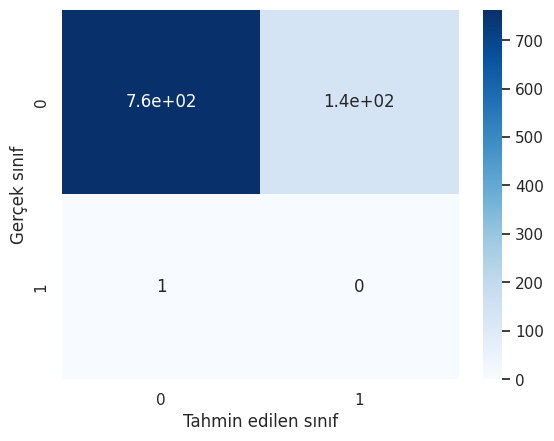

In [371]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix hesapla
cm = confusion_matrix(y_true2, y_pred)

# Görselleştir
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Tahmin edilen sınıf")
plt.ylabel("Gerçek sınıf")
plt.show()

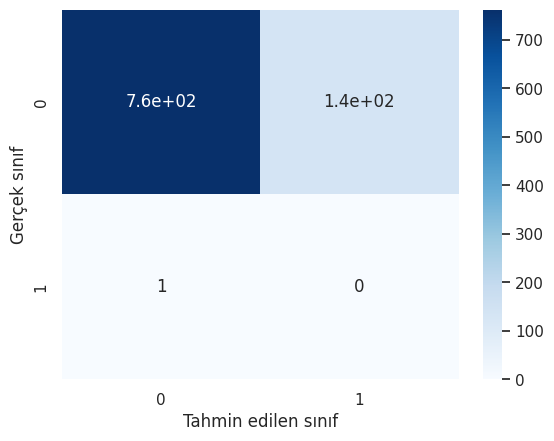

In [372]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion matrix hesapla
cm0 = confusion_matrix(y_true20, y_pred0)

# Görselleştir
sns.heatmap(cm0, annot=True, cmap="Blues")
plt.xlabel("Tahmin edilen sınıf")
plt.ylabel("Gerçek sınıf")
plt.show()